**ORIGEN, EXPLICACIÓN Y FORMATO DEL DATASET ANALIZADO**

- Importar las librerias

In [206]:
#Importar las librerías
import pandas as pd
import numpy as np 
import statistics as st

import mysql.connector
import os
import pymysql
import openpyxl 


import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

- Importar el dataset

In [207]:
#Importar el fichero heart.csv para poder trabajar con el en Jupyter Notebook con lenguaje Python y sus librerías
fichero='/Users/USUARIO/jupyter/heart.csv'
hd=pd.read_csv(fichero)

- Examinar nuestro dataset  

In [208]:
#Comprobar el tipo de dataset
type(hd)

pandas.core.frame.DataFrame

In [209]:
#Vistazo rápido y limitado a nuestro fichero:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [210]:
#Comprobar la forma de los datos 
hd.shape

(303, 14)

In [211]:
#Comprobar el tamaño del dataset 
hd.size

4242

In [212]:
#Comprobar si es una serie o un dataframe 
hd.ndim

2

In [213]:
#Longitud
len(hd)

303

In [214]:
#Índice
hd.index

RangeIndex(start=0, stop=303, step=1)

In [215]:
#Información sobre las columnas
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [216]:
#En la solicitud del análisis del dataset nos han proporcionado información sobre el significado de los campos 
#Comprobar la información que incluye el dataset y principalmente el "data type" de cada campo
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [217]:
#Resumen de la estadística descriptiva relacionada con las columnas
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**PROCESO DE LIMPIEZA DEL DATAFRAME**

- Ver columnas de registros aleatorios

In [218]:
#Datos de columnas de algunos registros seleccionados aleatoriamente
hd.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0


- Comprobar duplicidades en los registros de nuestro dataset

In [219]:
#Examinar si existen datos duplicados en nuestro dataset y si es así cuántos:
duplicados=hd.duplicated()
total_duplicados = duplicados.sum()
total_duplicados

1

In [220]:
#Ver cuál es el registo duplicado:
registros_duplicados = hd[duplicados]
registros_duplicados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [221]:
#Ver un detalle de la localización de esos registros posiblemente duplicados
fila_163 = hd.iloc[163]

In [222]:
fila_164 = hd.iloc[164]

In [223]:
fila_165 = hd.iloc[165]

In [224]:
df_concat = pd.concat([fila_163,fila_164, fila_165],axis=1)
print(df_concat)

            163    164    165
age        38.0   38.0   67.0
sex         1.0    1.0    1.0
cp          2.0    2.0    0.0
trestbps  138.0  138.0  160.0
chol      175.0  175.0  286.0
fbs         0.0    0.0    0.0
restecg     1.0    1.0    0.0
thalach   173.0  173.0  108.0
exang       0.0    0.0    1.0
oldpeak     0.0    0.0    1.5
slope       2.0    2.0    1.0
ca          4.0    4.0    3.0
thal        2.0    2.0    2.0
target      1.0    1.0    0.0


- Eliminar registros duplicados

In [225]:
# Eliminar la fila/registro con el índice especificado como registros_duplicados -> 164
df_hd = hd.drop(164)

In [226]:
#Comprobar que la longitud del nuevo dataframe se ha reducido a 302
len(df_hd)

302

In [227]:
#Comprobar que ya no existen datos/registros duplicados:
duplicados2=df_hd.duplicated()
total_duplicados2 = duplicados2.sum()
total_duplicados2

0

In [228]:
#Forzar la aparición de los datos nulos: 
df_hd.reindex()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [229]:
#Comprobar el máximo de registros/filas que permite ver Pandas:
pd.options.display.max_rows

303

In [230]:
#Modificar el máximo de filas que permite ver Pandas:
pd.options.display.max_rows = 303 #porque nuestros registros empiezan desde el "0"

In [231]:
#Forzar la aparición de los datos nulos en todos los registros: 
df_hd.reindex()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


- Comprobar si existen datos nulos

In [232]:
#Comprobar si existen datos nulos y si es así cuántos
cantidad_nulos= df_hd.isnull().sum()
cantidad_nulos

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [233]:
#Cantidad de datos sin tener en cuenta los datos nulos
cantidad_datos = df_hd.count()
cantidad_datos

age         302
sex         302
cp          302
trestbps    302
chol        302
fbs         302
restecg     302
thalach     302
exang       302
oldpeak     302
slope       302
ca          302
thal        302
target      302
dtype: int64

_No existen nulos y tampoco queda ningún registro duplicado. Por tanto, hemos finalizado con la limpieza_

**ALMACENAMIENTO Y ACCESO AL DATASET EN EL DATA WAREHOUSE (MySQL)**

- Comprobar la correlaciones

In [234]:
#Comprobar correlaciones
print(df_hd.corr())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.065317  0.211452 -0.160370  0.062870  0.096810 -0.03

In [235]:
#Comprobar la correlación con los datos de "target" - tener o no tener cardiopatías
print(df_hd.corr()['target'].abs().sort_values(ascending=False))

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


_Las correlaciones que vemos en la primera aproximación son muy moderadas, siendo "fbs" la que presenta la correlación más debil._

- Convertir el dataframe limpio en un fichero .csv

In [236]:
#Convertir el dataframe limpio en un fichero .csv
df_hd.to_csv('dataset_hd.csv', encoding='utf-8')

**EDA - ANÁLISIS EXPLORATORIO DE DATOS**

- Traer los datos desde MySQL - **_Conectar MySQL con Jupyter Notebook_**

_Las librerías que se necesitan para este paso se importaron al principio de este cuaderno_

In [237]:
#Conectar nuestra base de datos 'heart' de MySQL (Data Warehouse) a Jupyter 
host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
    host='localhost',
    port=3306,
    user='lorena',
    password='LoreLou_2023',
    database='heart',
    charset='utf8mb4')
#Convertir la "query" (seleccionar toda la tabla "heart_data") en un nuevo dataframe "df"
df = pd.read_sql_query("SELECT * FROM heart_data", conn)
df.head(10)#Pedir que nos muestre el dataframe "df" (únicamente las 10 primeras líneas)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15644\3608188435.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM heart_data", conn)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [238]:
#Conectar nuestra base de datos 'heart' de MySQL (Data Warehouse) a Jupyter 
host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
    host='localhost',
    port=3306,
    user='lorena',
    password='LoreLou_2023',
    database='heart',
    charset='utf8mb4')

#Convertir la "query" (seleccionar toda la tabla "rango_edad") en un nuevo dataframe "df_rango"
df_rango = pd.read_sql_query("SELECT * FROM rango_edad", conn)
df_rango.head(4) #Pedir que nos muestre el dataframe "df_rango" (4 primeras líneas y únicas - rangos de edad)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15644\1964066441.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rango = pd.read_sql_query("SELECT * FROM rango_edad", conn)


,rango_edad,total_personas,total_enfermos,total_hombres_enfermos,total_mujeres_enfermas,porcentaje_enfermos,porcentaje_hombres_enfermos,porcentaje_mujeres_enfermas
0,> 60,79,35,13,22,44.3038,16.4557,27.8481
1,29-39,15,11,6,5,73.3333,40.0000,33.3333
2,40-50,79,54,33,21,68.3544,41.7722,26.5823
3,51-60,129,64,40,24,49.6124,31.0078,18.6047


- Resumen estadístico 

In [239]:
#Resumen estadístico del dataframe "df"
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**EDA y VISUALIZACIÓN DE LOS DATOS**

_Disponemos de un dato que clasifica si las personas tienen o no una cardiopatía ("target"). Intentaremos usar estos datos para crear un modelo (entrenado) que trate de predecir si una persona (en función de unas variables determinadas) puede sufrir una cardiopatía._

**_Variable "target" - diagnóstico cardiopatías:_**

In [240]:
#Exploración datos - número de individuos con y sin cardiopatía (1 - con cardiopatía y 0 - sin cardiopatía)
df.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

_Nuestros registros incluyen a 164 personas con cardiopatía y 138 en las que no se ha detectado_

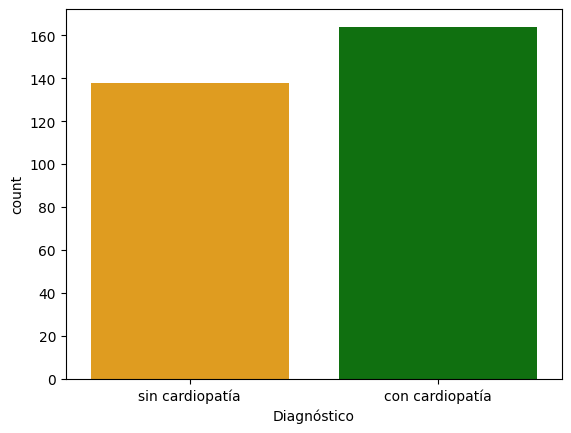

In [241]:
#Personas con una cardiopatía vs personas sin una cardiopatía
#Utilizaremos un "Countplot":
##tipo de gráfico que muestra la cantidad de observaciones en cada categoría de una variable categórica (0: sin cardiopatía, 1:con cardiopatía)

#Etiquetas eje x:
cardio = ['sin cardiopatía', 'con cardiopatía']
colors = ['orange','green']

# Crear el gráfico de barras con countplot:
ax = sns.countplot(x='target', data=df, palette=colors)

# Cambiar las etiquetas del eje x:
ax.set_xticklabels(cardio)

# Mostrar el gráfico:
plt.xlabel('Diagnóstico')
plt.show()

In [242]:
#Porcentaje de personas con y sin cardiopatías:

sincardiopat = len(df[df.target == 0])
concardiopat = len(df[df.target == 1])
print("Porcentaje de personas que no tienen cardiopatías: {:.2f}%".format((sincardiopat / (len(df.target))*100)))
print("Porcentaje de personas con cardiopatías: {:.2f}%".format((concardiopat / (len(df.target))*100)))

Porcentaje de personas que no tienen cardiopatías: 45.70%
Porcentaje de personas con cardiopatías: 54.30%


Text(0.5, 1.0, 'Personas sin cardiopatías y personas con cardiopatías (%)')

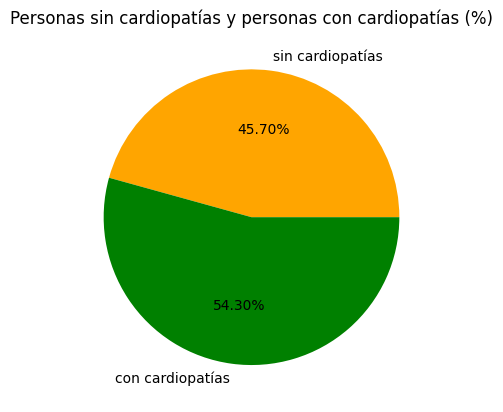

In [243]:
#Visualización del resultado anterior
#Conocer el porcentaje de personas con y sin cardiopatías:
target = df.target.value_counts()
sanos = round(target[0]*100/302,2)
enfermos= round(target[1]*100/302,2)
sano_vs_enfermo = ['sin cardiopatías','con cardiopatías']
variables=[sanos,enfermos]
color = ['orange','green']

#Vamos a representar esta información con un gráfico tipo tarta:

plt.pie(x=variables, labels=sano_vs_enfermo, colors=color, autopct='%1.2f%%')

plt.title('Personas sin cardiopatías y personas con cardiopatías (%)')

**_Variables "sex" ('mujeres' y 'hombres') y 'age' (en años):_**

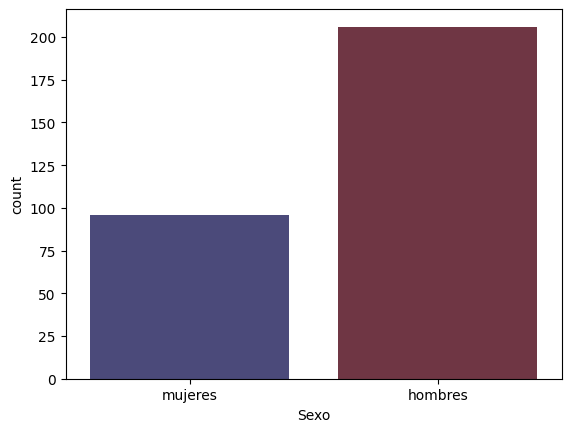

In [244]:
#Countplot para mostrar la cantidad de observaciones en cada categoría de la variable categórica sexo (0: mujeres, 1:hombres)
#Etiquetas eje x:
sexo = ['mujeres', 'hombres']

#Crear el gráfico de barras con countplot:
ax = sns.countplot(x='sex', data=df, palette="icefire")

#Cambiar las etiquetas del eje x:
ax.set_xticklabels(sexo)

# Mostrar el gráfico:
plt.xlabel('Sexo')
plt.show()

In [245]:
#Calcular la media de nuestros parámetros en función del diagnóstico:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


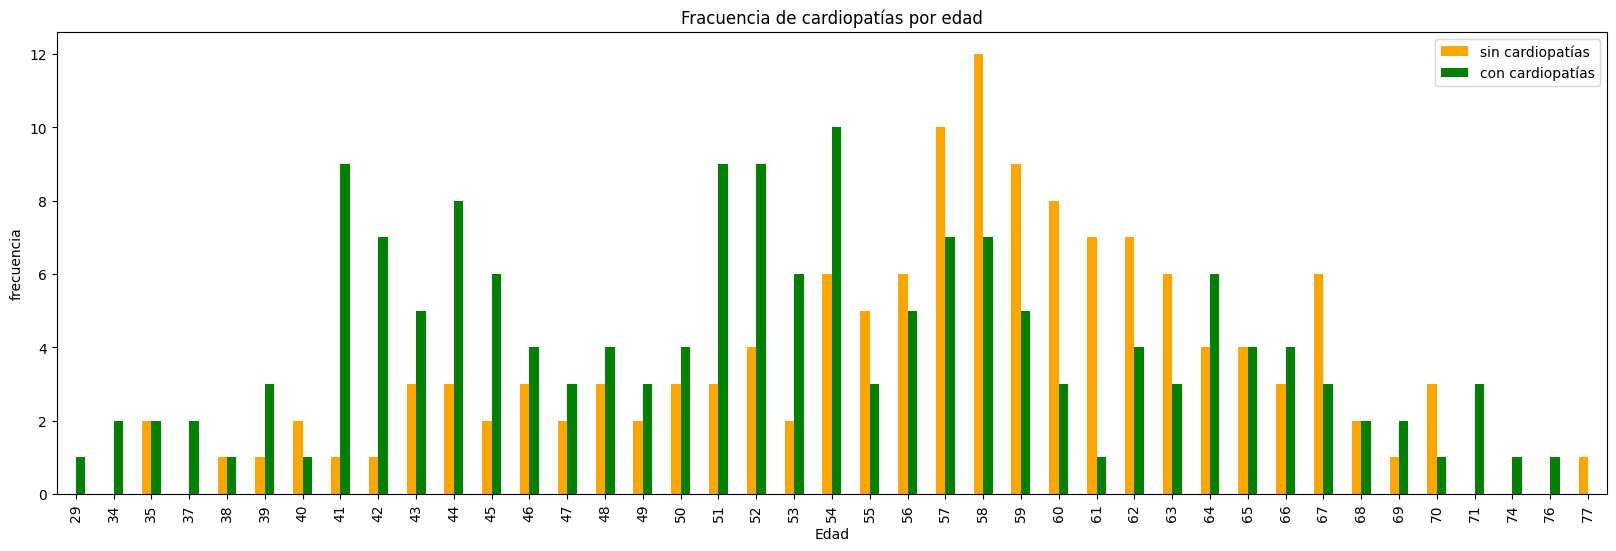

In [246]:
#La función pd.crosstab() en Pandas se utiliza para calcular una tabla de frecuencias cruzadas:
##Tabla de frecuencias cruzadas (años - diagnóstico):
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6),color=['orange','green'])
plt.title('Fracuencia de cardiopatías por edad')
plt.xlabel('Edad')
plt.legend(["sin cardiopatías", "con cardiopatías"])
plt.ylabel('frecuencia')
plt.savefig('heartDiseaseAndAges.png') #guardar el gráfico como ".png"
plt.show()

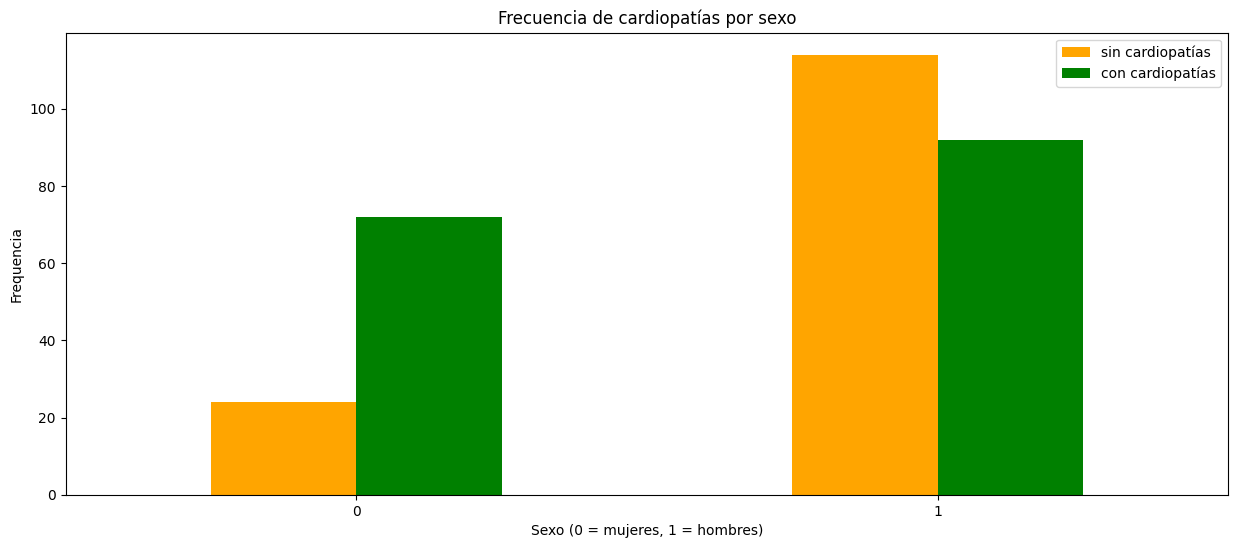

In [247]:
#Tabla de frecuencias cruzadas (sexo - diagnóstico):

pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(15,6),color=['orange','green'])
plt.title('Frecuencia de cardiopatías por sexo')
plt.xlabel('Sexo (0 = mujeres, 1 = hombres)')
plt.xticks(rotation=0)
plt.legend(["sin cardiopatías", "con cardiopatías"])
plt.ylabel('Frequencia')
plt.show()

**_Análisis por rango de edades_**

_Ahora sí que va a ser de utilizad la tabla que viene de MySQL y que convertimos anteriormente en el dataframe "df_rango" ya que nos permite ir un poco más allá y ver las diferencias por ranto de edad_

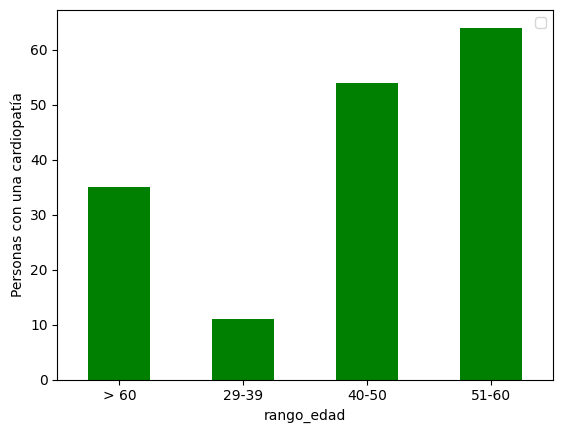

In [248]:
#Gráfico de barras o "bar plot" - gráfico utilizado para visualizar la magnitud de la variable numérica en cada categoría.
bar_plot1 = df_rango.plot.bar(x='rango_edad', y='total_enfermos', rot=0, color='green')
#Etiqueta del eje y
plt.ylabel('Personas con una cardiopatía')
#Al proporcionar la etiqueta del eje y y sólo tener un color no nos haría falta la leyenda:
plt.legend(labels=[])
plt.show()

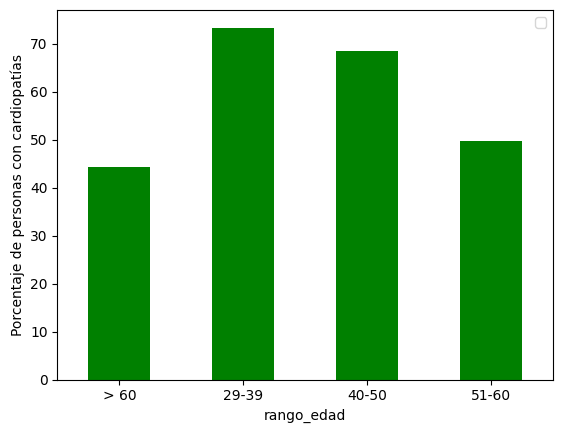

In [249]:
#Conocer el porcentaje de cardiopatías por rango de edad:
bar_plot2 = df_rango.plot.bar(x='rango_edad', y='porcentaje_enfermos', rot=0, color='green')
#Etiqueta del eje y
plt.ylabel('Porcentaje de personas con cardiopatías')
#Al proporcionar la etiqueta del eje y y sólo tener un color no nos haría falta la leyenda:
plt.legend(labels=[])
plt.show()

In [250]:
# Seleccionar las columnas del DataFrame original "df_rango"
columnas_seleccionadas = ['total_hombres_enfermos','total_mujeres_enfermas']
df_nuevo = pd.DataFrame(df_rango[columnas_seleccionadas])

# Establecer la columna 'rango_edad' como el índice del nuevo DataFrame
df_nuevo.set_index(df_rango['rango_edad'], inplace=True)

# Imprimir el nuevo DataFrame
print(df_nuevo)

            total_hombres_enfermos  total_mujeres_enfermas
rango_edad                                                
> 60                            13                      22
29-39                            6                       5
40-50                           33                      21
51-60                           40                      24


Text(0, 0.5, 'Total personas con una cardiopatía')

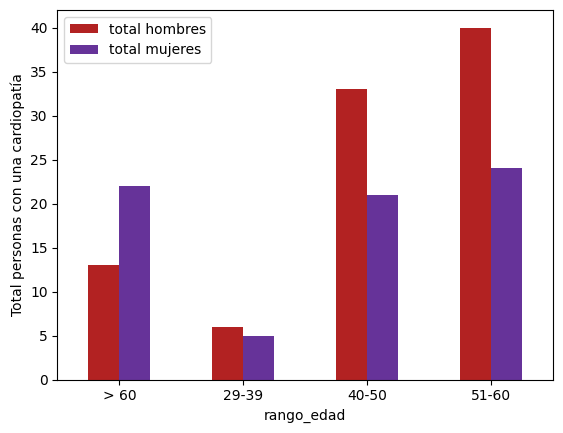

In [251]:
#Gráfico de barras para visualizarel total de hombres y de mujeres con una cardiopatía
plot_cardio = df_nuevo.plot.bar(rot = 0,color={'total_hombres_enfermos': 'firebrick','total_mujeres_enfermas': 'rebeccapurple'})
#Modificar leyenda:
leyenda=['total hombres', 'total mujeres']
plt.legend(leyenda)
#Etiqueta del eje y
plt.ylabel('Total personas con una cardiopatía')

In [252]:
# Seleccionar las columnas del DataFrame original
columna_seleccionada2 = ['porcentaje_hombres_enfermos', 'porcentaje_mujeres_enfermas']
df_new = pd.DataFrame(df_rango[columna_seleccionada2])

# Establecer la columna 'rango_edad' como el índice del nuevo DataFrame
df_new.set_index(df_rango['rango_edad'], inplace=True)

# Imprimir el nuevo DataFrame
print(df_new)

            porcentaje_hombres_enfermos  porcentaje_mujeres_enfermas
rango_edad                                                          
> 60                            16.4557                      27.8481
29-39                           40.0000                      33.3333
40-50                           41.7722                      26.5823
51-60                           31.0078                      18.6047


Text(0, 0.5, 'Porcentaje de personas con una cardiopatía')

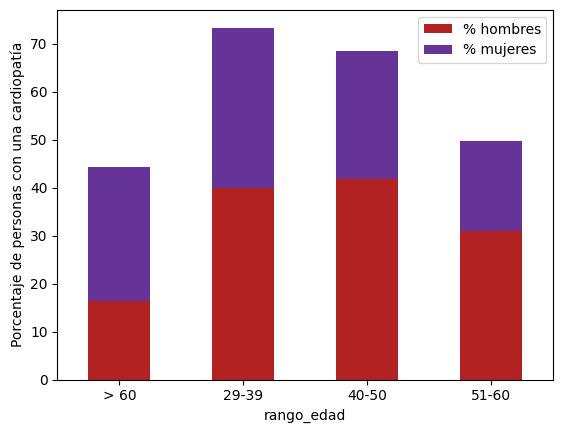

In [253]:
# Gráfico de barras apiladas (stacked bar plot) para visualizar categorías como barras, donde cada barra se divide en segmentos que representan diferentes subcategorías (hombre/mujer).
plot_disease = df_new.plot.bar(rot = 0, color={'porcentaje_hombres_enfermos':'firebrick','porcentaje_mujeres_enfermas':'rebeccapurple'}, stacked = True)
#Modificar leyenda:
leyenda=['% hombres', '% mujeres']
plt.legend(leyenda)
#Etiqueta del eje y
plt.ylabel('Porcentaje de personas con una cardiopatía')

In [254]:
df_rango.sum()

rango_edad                     > 6029-3940-5051-60
total_personas                                 302
total_enfermos                                 164
total_hombres_enfermos                          92
total_mujeres_enfermas                          72
porcentaje_enfermos                       235.6039
porcentaje_hombres_enfermos               129.2357
porcentaje_mujeres_enfermas               106.3684
dtype: object

_Como vemos anteriormente, el número de registros para cada rango de edad definido es muy distinto (6029 - 3940 - 5051 - 60). Por tanto, para poder seguir haciendo un estudio por rango de edades sería necesario que el número de registros por rango sea similar o por lo menos que no existan tantas diferencias_

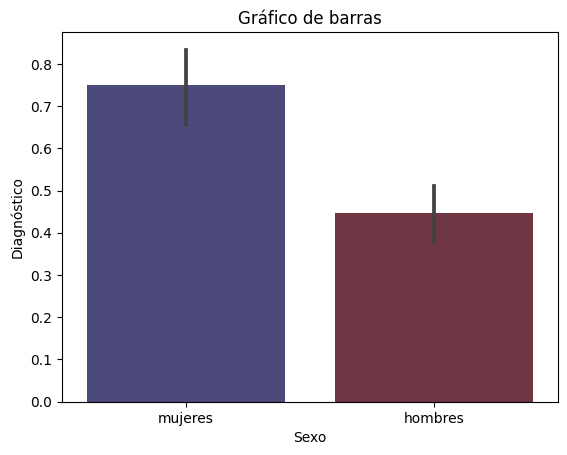

In [255]:
# Datos 
x = df['sex']
y = df['target']

# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x=x, y=y, palette="icefire")

# Añadir etiquetas y título
plt.xlabel('Sexo')
plt.ylabel('Diagnóstico')
plt.title('Gráfico de barras')

#Etiqueta eje x:
eje_x=['mujeres','hombres']
plt.gca().set_xticklabels(eje_x)


# Mostrar el gráfico
plt.show()


- **Estudio de las variables restantes:**

**Dolor de pecho** (variable categórica: 0 - asintomático, 1 - angina atípica, 2 - dolor no anginoso y 3 - angina típica):

In [256]:
#Dolor de pecho:
# Obtener los valores únicos de la variable
valores = df['cp'].unique()
valores

array([3, 2, 1, 0], dtype=int64)

In [257]:
# Contar la cantidad de veces que se repite cada valor categórico
count = df['cp'].value_counts()
count

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

_El dolor de pecho más habitual tras los asintomáticos (143) son los dolores de pecho no anginosos (86). Siendo las anginas típicas las presentes en menor frecuencia (23)_

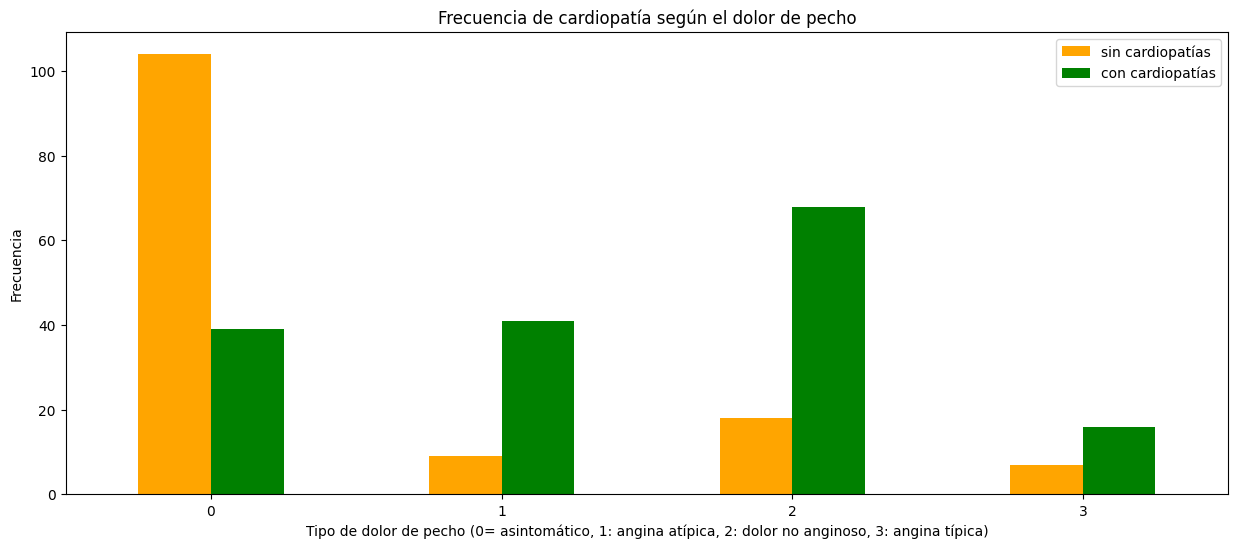

In [258]:
#Crosstab() en Pandas se utiliza para calcular una tabla de frecuencias cruzadas
#Es una forma conveniente de resumir y analizar la relación entre diferentes variables categóricas.
#Crear el gráfico "Crosstab":
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['orange','green'])
#Asignar título del gráfico:
plt.title('Frecuencia de cardiopatía según el dolor de pecho')
#Asignar etiqueta eje x:
plt.xlabel('Tipo de dolor de pecho (0= asintomático, 1: angina atípica, 2: dolor no anginoso, 3: angina típica)')
#Establecer la rotación de las etiquetas en el eje x:
plt.xticks(rotation = 0)
#Leyenda:
plt.legend(['sin cardiopatías', 'con cardiopatías'])
#Asignar etiqueta eje y:
plt.ylabel('Frecuencia')
# Mostrar el gráfico:
plt.show()

**Presión aterial en reposo (Hg/mg)** (variable continua):

In [259]:
# Obtener la media 
media = np.mean(df.trestbps)
print("Media:", media)

# Obtener el valor máximo
maximo = max(df.trestbps)
print("Valor máximo:", maximo)

# Obtener el valor mínimo
minimo = min(df.trestbps)
print("Valor mínimo:", minimo)

Media: 131.60264900662253
Valor máximo: 200
Valor mínimo: 94


_El valor máximo de la presión arterial en reposo es 200 Hg/mg, el mínimo 94 Hg/mg y la media de todos los valores es 131.60 Hg/mg_

La función plt.scatter() en Matplotlib se utiliza para crear un gráfico de dispersión o scatter plot, que muestra la relación entre dos variables

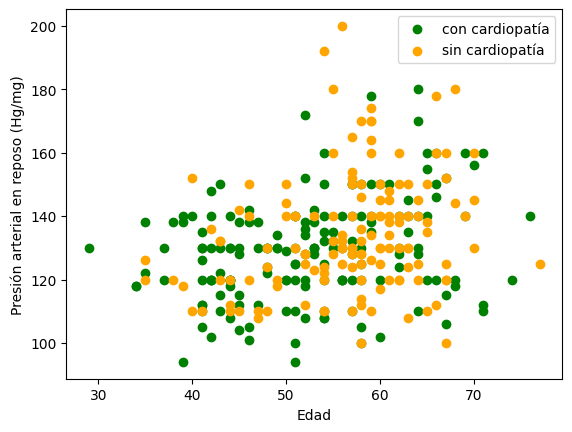

In [260]:
#Scatter plot - gráfico de dispersión entre las variables numéricas edad y presión arterial en reposo (teniendo en cuenta si existe cardiopatía o no) 

plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c='green')
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Presión arterial en reposo (Hg/mg)')
plt.show()

**Colesterol sérico (mg/dl)** (variable continua):

In [261]:
# Obtener la media 
media = np.mean(df.chol)
print("Media:", media)

# Obtener el valor máximo
maximo = max(df.chol)
print("Valor máximo:", maximo)

# Obtener el valor mínimo
minimo = min(df.chol)
print("Valor mínimo:", minimo)

Media: 246.5
Valor máximo: 564
Valor mínimo: 126


_El valor máximo de colesterol sérico es 564 mg/dl, el mínimo 126 mg/dl y la media de todos los valores es 246.5 mg/dl_

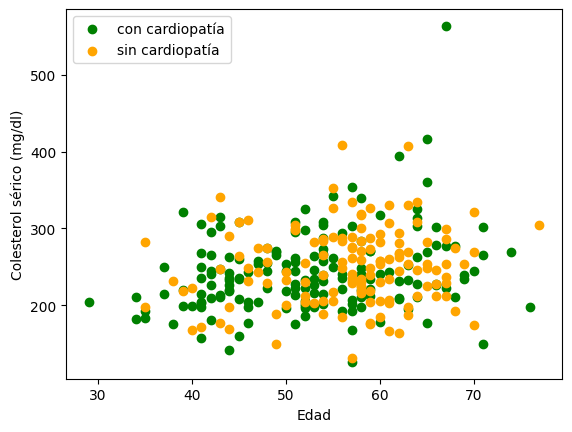

In [262]:
#Scatter plot - gráfico de dispersión entre las variables numéricas edad y el colesterol sérico (teniendo en cuenta si existe cardiopatía o no) 

plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c='green')
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Colesterol sérico (mg/dl)')
plt.show()

**Glucemia en ayunas** (variable categórica: 0 - <120 mg/dl, 1 - >120mg/dl):

In [263]:
# Obtener los valores únicos de la variable
valunic = df['fbs'].unique()
valunic

array([1, 0], dtype=int64)

In [264]:
# Contar la cantidad de veces que se repite cada valor categórico
counts = df['fbs'].value_counts()
counts

fbs
0    257
1     45
Name: count, dtype: int64

_La mayor parte de las personas de nuestro registro muestran valores de glucemia en ayunas <120 mg/dl_

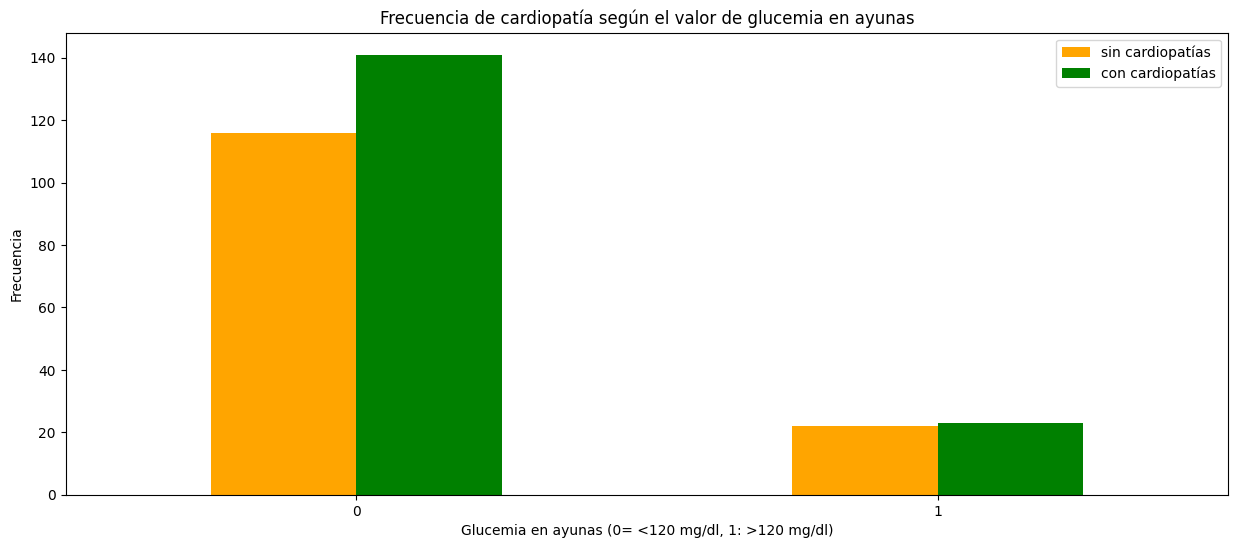

In [265]:
#Crosstab() en Pandas se utiliza para calcular una tabla de frecuencias cruzadas
#Es una forma conveniente de resumir y analizar la relación entre diferentes variables categóricas.
#Crear el gráfico "Crosstab":
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['orange','green'])
#Asignar título del gráfico:
plt.title('Frecuencia de cardiopatía según el valor de glucemia en ayunas')
#Asignar etiqueta eje x:
plt.xlabel('Glucemia en ayunas (0= <120 mg/dl, 1: >120 mg/dl)')
#Establecer la rotación de las etiquetas en el eje x:
plt.xticks(rotation = 0)
#Leyenda:
plt.legend(['sin cardiopatías', 'con cardiopatías'])
#Asignar etiqueta eje y:
plt.ylabel('Frecuencia')
# Mostrar el gráfico:
plt.show()

**Electrocardiograma (ECG) en reposo** (variable categórica: 0 - hipertrofia ventricular probable o definitiva, 1 - normal, 2 - onda S-T anormal):

In [266]:
#Electrocardiograma (ECG) en reposo 
# Obtener los valores únicos de la variable
valores1 = df['restecg'].unique()
valores1

array([0, 1, 2], dtype=int64)

In [267]:
# Contar la cantidad de veces que se repite cada valor categórico
count1 = df['restecg'].value_counts()
count1

restecg
1    151
0    147
2      4
Name: count, dtype: int64

_La mayor parte de las personas de nuestro registro muestran valores normales en el ECG en reposo. Sin embargo, 147 muestran una hipertrofia probable o definitiva_

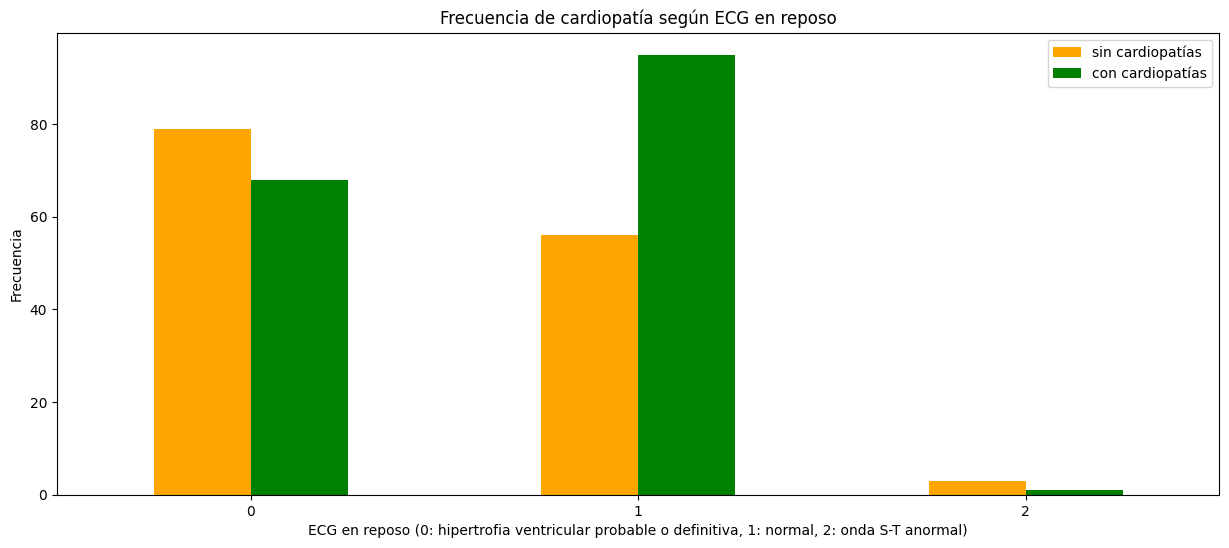

In [268]:
#Crosstab() en Pandas se utiliza para calcular una tabla de frecuencias cruzadas
#Es una forma conveniente de resumir y analizar la relación entre diferentes variables categóricas.
#Crear el gráfico "Crosstab":
pd.crosstab(df.restecg,df.target).plot(kind="bar",figsize=(15,6),color=['orange','green'])
#Asignar título del gráfico:
plt.title('Frecuencia de cardiopatía según ECG en reposo')
#Asignar etiqueta eje x:
plt.xlabel('ECG en reposo (0: hipertrofia ventricular probable o definitiva, 1: normal, 2: onda S-T anormal)')
#Establecer la rotación de las etiquetas en el eje x:
plt.xticks(rotation = 0)
#Leyenda:
plt.legend(['sin cardiopatías', 'con cardiopatías'])
#Asignar etiqueta eje y:
plt.ylabel('Frecuencia')
# Mostrar el gráfico:
plt.show()

**Frecuencia cardiaca máxima alcanzada** (variable continua):

In [269]:
# Obtener la media 
media = np.mean(df.thalach)
print("Media:", media)

# Obtener el valor máximo
maximo = max(df.thalach)
print("Valor máximo:", maximo)

# Obtener el valor mínimo
minimo = min(df.thalach)
print("Valor mínimo:", minimo)

Media: 149.56953642384107
Valor máximo: 202
Valor mínimo: 71


_La frecuencia cardiaca máxima en nuestros datos presenta como valor máximo 202, como mínimo 71 y la media de todos los valores es 149.57_

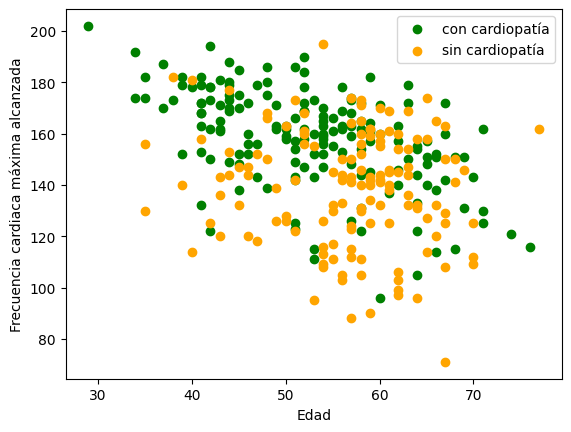

In [270]:
#Scatter plot - gráfico de dispersión entre las variables numéricas edad y la frecuencia cardiaca máxima alcanzada (teniendo en cuenta si existe cardiopatía o no) 

plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='green')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia cardiaca máxima alcanzada')
plt.show()

**Angina inducida por ejercicio** (variable categórica: 0 - no, 1 - si):

In [271]:
#Angina inducida por ejercicio
# Obtener los valores únicos de la variable
valores1 = df['exang'].unique()
valores1

array([0, 1], dtype=int64)

In [272]:
# Contar la cantidad de veces que se repite cada valor categórico
count1 = df['exang'].value_counts()
count1

exang
0    203
1     99
Name: count, dtype: int64

_En nuestros registros es más frecuente que no se induzca una angina por ejercicio (203 que no frente a 99 que si). Sin embargo, en el gráfico siguiente podemos ver que aunque la angina no sea inducida por ejercicio en esa categoría se detectan más cardiopatías_

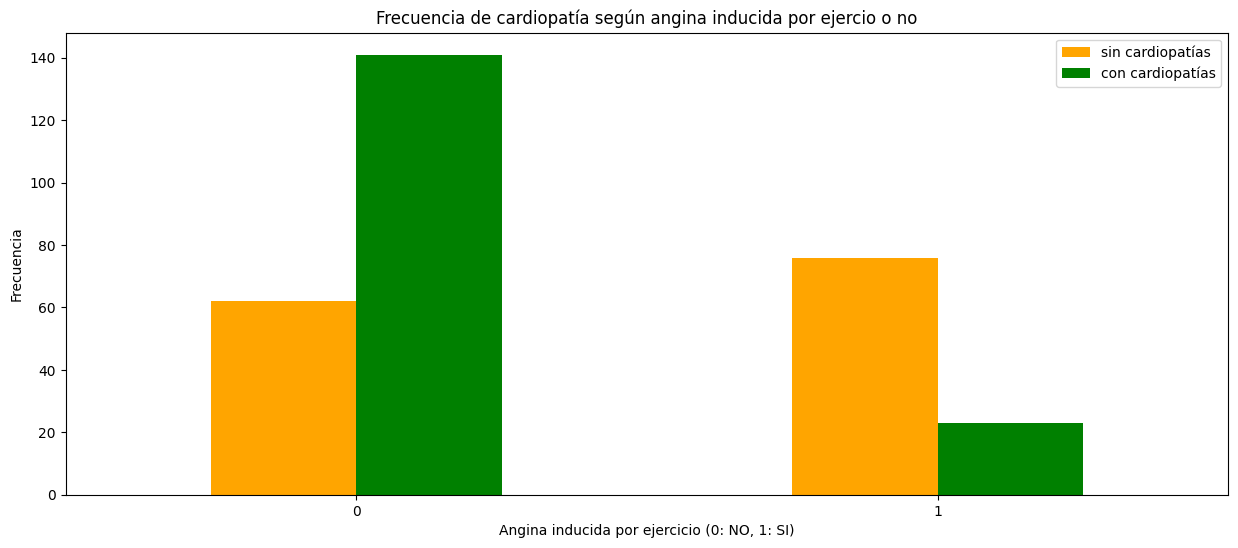

In [273]:
#Crosstab() en Pandas se utiliza para calcular una tabla de frecuencias cruzadas
#Es una forma conveniente de resumir y analizar la relación entre diferentes variables categóricas.
#Crear el gráfico "Crosstab":
pd.crosstab(df.exang,df.target).plot(kind="bar",figsize=(15,6),color=['orange','green'])
#Asignar título del gráfico:
plt.title('Frecuencia de cardiopatía según angina inducida por ejercio o no')
#Asignar etiqueta eje x:
plt.xlabel('Angina inducida por ejercicio (0: NO, 1: SI)')
#Establecer la rotación de las etiquetas en el eje x:
plt.xticks(rotation = 0)
#Leyenda:
plt.legend(['sin cardiopatías', 'con cardiopatías'])
#Asignar etiqueta eje y:
plt.ylabel('Frecuencia')
# Mostrar el gráfico:
plt.show()

**Depresión S-T inducida por ejercicio en relción con reposo** (variable continua):

In [274]:
# Obtener la media 
media = np.mean(df.oldpeak)
print("Media:", media)

# Obtener el valor máximo
maximo = max(df.oldpeak)
print("Valor máximo:", maximo)

# Obtener el valor mínimo
minimo = min(df.oldpeak)
print("Valor mínimo:", minimo)

Media: 1.0430463576158941
Valor máximo: 6.2
Valor mínimo: 0.0


_El valor máximo de la depresión S-T es 6.2, el mínimo 0.0 y la media de todos los valores es 1.04_

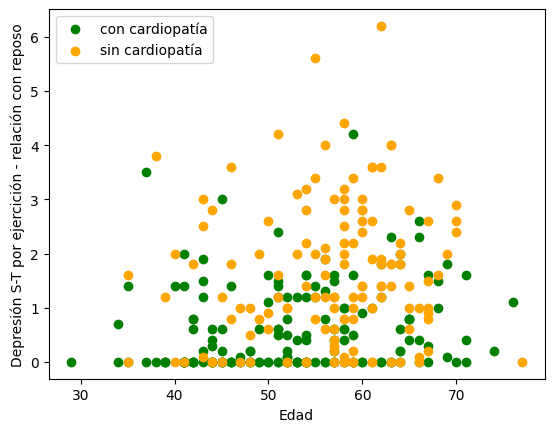

In [275]:
#Scatter plot - gráfico de dispersión entre las variables numéricas edad y la depresión S-T inducida por ejercicio en relación con el reposo (teniendo en cuenta si existe cardiopatía o no) 

plt.scatter(x=df.age[df.target==1], y=df.oldpeak[(df.target==1)], c='green')
plt.scatter(x=df.age[df.target==0], y=df.oldpeak[(df.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Depresión S-T por ejercición - relación con reposo')
plt.show()

_Del gráfico anterior se puede observar un cierto patrón de que las personas con cardiopatías tienen valores más bajos de la depresión S-T en relación a las personas sin cardiopatías_

**Pendiente segmento S-T** (variable categórica: 0 - descendente, 1 - plano, 2 - ascendente):

In [276]:
#Pendiente segmento S-T
# Obtener los valores únicos de la variable
valores3 = df['slope'].unique()
valores3

array([0, 2, 1], dtype=int64)

In [277]:
# Contar la cantidad de veces que se repite cada valor categórico
count3 = df['slope'].value_counts()
count3

slope
2    141
1    140
0     21
Name: count, dtype: int64

_En nuestros registros es más frecuente que haya pendientes ascendentes (141) o planas (140) frente a las descendentes (21)_

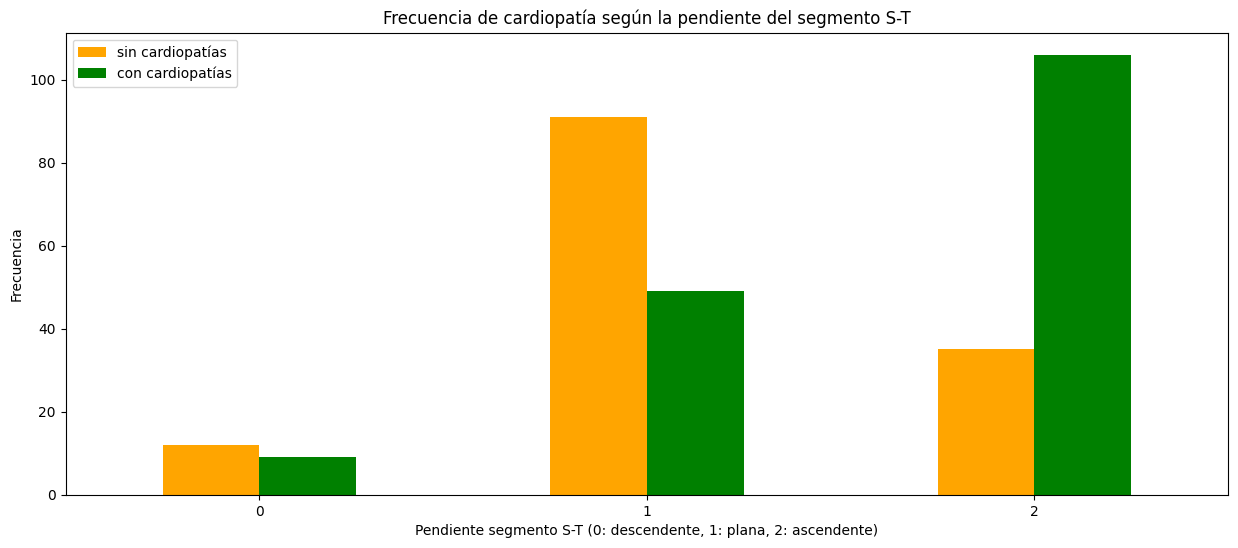

In [278]:
#Crosstab() en Pandas se utiliza para calcular una tabla de frecuencias cruzadas
#Es una forma conveniente de resumir y analizar la relación entre diferentes variables categóricas.
#Crear el gráfico "Crosstab":
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['orange','green'])
#Asignar título del gráfico:
plt.title('Frecuencia de cardiopatía según la pendiente del segmento S-T')
#Asignar etiqueta eje x:
plt.xlabel('Pendiente segmento S-T (0: descendente, 1: plana, 2: ascendente)')
#Establecer la rotación de las etiquetas en el eje x:
plt.xticks(rotation = 0)
#Leyenda:
plt.legend(['sin cardiopatías', 'con cardiopatías'])
#Asignar etiqueta eje y:
plt.ylabel('Frecuencia')
# Mostrar el gráfico:
plt.show()

_En el gráfico anterior se puede intuir una cierta relación entre que la pendiente del segmento S-T sea ascendente y tener una cardiopatía_

**Número de vasos mayores (de 0 a 3)** (variable continua):

In [279]:
# Obtener la media 
media = np.mean(df.ca)
print("Media:", media)

# Obtener la media 
moda = st.mode(df.ca)
print("Moda:", moda)

Media: 0.7185430463576159
Moda: 0


In [280]:
# Obtener los valores únicos de la variable
valores1 = df['ca'].unique()
valores1

array([0, 2, 1, 3, 4], dtype=int64)

_En nuestra descripción el número de vasos mayores es de 0-3, pero sabemos que existe el valor de 4 y este valor en el siguiente gráfico está más relacionado con personas que presentan una cardiopatía_

_El número de vasos mayores más repetido entre nuestros valores es "0" y la media es 0.72_

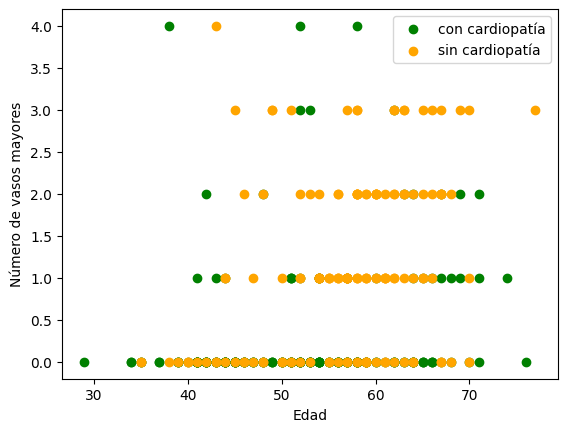

In [281]:
#Scatter plot - gráfico de dispersión entre las variables numéricas edad y la depresión S-T inducida por ejercicio en relación con el reposo (teniendo en cuenta si existe cardiopatía o no) 

plt.scatter(x=df.age[df.target==1], y=df.ca[(df.target==1)], c='green')
plt.scatter(x=df.age[df.target==0], y=df.ca[(df.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Número de vasos mayores')
plt.show()

**Talasemia** - thal (variable categórica: 1 - normal, 2 - defecto fijo, 3 - defecto reversible):

In [282]:
#Talasemia
# Obtener los valores únicos de la variable
valor = df['thal'].unique()
valor

array([1, 2, 3, 0], dtype=int64)

In [283]:
# Contar la cantidad de veces que se repite cada valor categórico
count4 = df['thal'].value_counts()
count4

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

_En la descripción de esta variable solo se definen las categorías 1, 2 y 3 pero no la "0" y vemos que tiene 2 registros (ver también el siguiente gráfico), creo que puede ser un error a la hora de asignarle una categoría, ¡cuidado al hacer el modelo!_

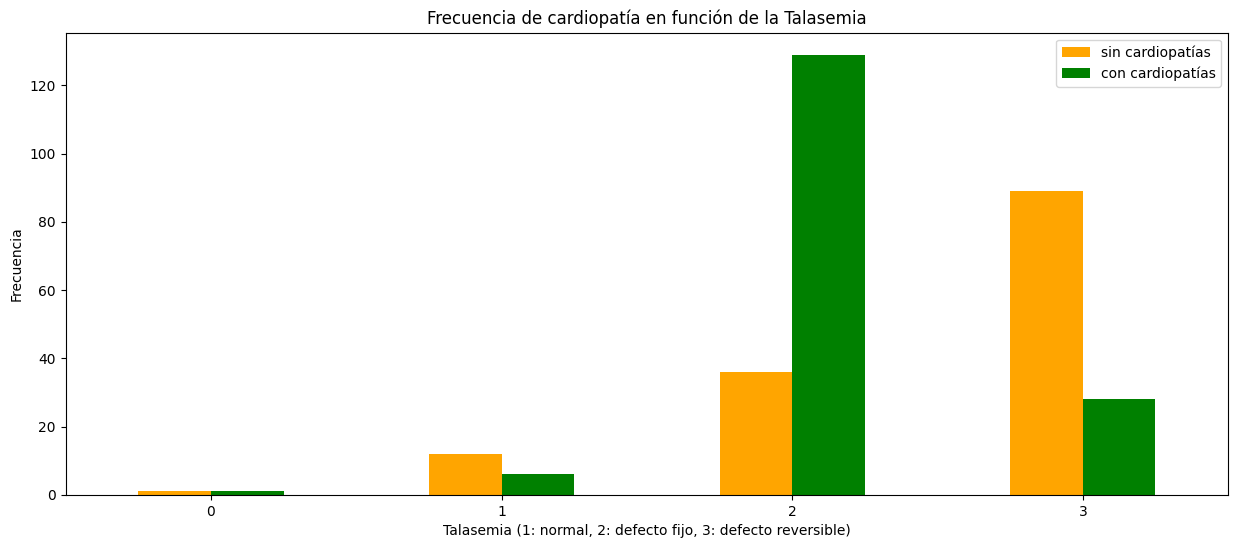

In [284]:
#Crosstab() en Pandas se utiliza para calcular una tabla de frecuencias cruzadas
#Es una forma conveniente de resumir y analizar la relación entre diferentes variables categóricas.
#Crear el gráfico "Crosstab":
pd.crosstab(df.thal,df.target).plot(kind="bar",figsize=(15,6),color=['orange','green'])
#Asignar título del gráfico:
plt.title('Frecuencia de cardiopatía en función de la Talasemia')
#Asignar etiqueta eje x:
plt.xlabel('Talasemia (1: normal, 2: defecto fijo, 3: defecto reversible)')
#Establecer la rotación de las etiquetas en el eje x:
plt.xticks(rotation = 0)
#Leyenda:
plt.legend(['sin cardiopatías', 'con cardiopatías'])
#Asignar etiqueta eje y:
plt.ylabel('Frecuencia')
# Mostrar el gráfico:
plt.show()

_Las personas con una Talasemia con defecto fijo parece que presentan una mayor frecuencia de personas con cardiopatías_

- **Análisis conjunto variables categóricas**

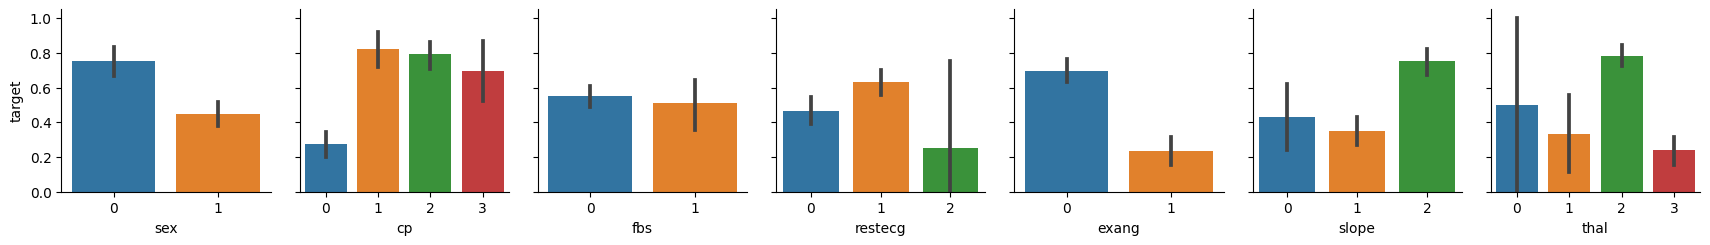

In [285]:
#Análisis de las variables categóricas en relación al diagnóstico de sufrir una cardiopatía ("target")
# Datos categóricos:
data_categoric = {'sex': df['sex'],'cp': df['cp'],'fbs': df['fbs'], 'restecg': df['restecg'],'exang': df['exang'],'slope': df['slope'],'thal': df['thal'],'target': df['target']}
#Crear un dataframe sólo con las variables categóricas:
df_categ = pd.DataFrame(data_categoric)

# Obtener lista de variables categóricas
categorical_vars = ['sex','cp','fbs', 'restecg','exang','slope','thal']

# Crear matriz de gráficos
grid = sns.PairGrid(df, y_vars='target', x_vars=categorical_vars)
grid.map(sns.barplot)

# Mostrar el gráfico
plt.show()

- **Análisis conjunto de las variables continuas**

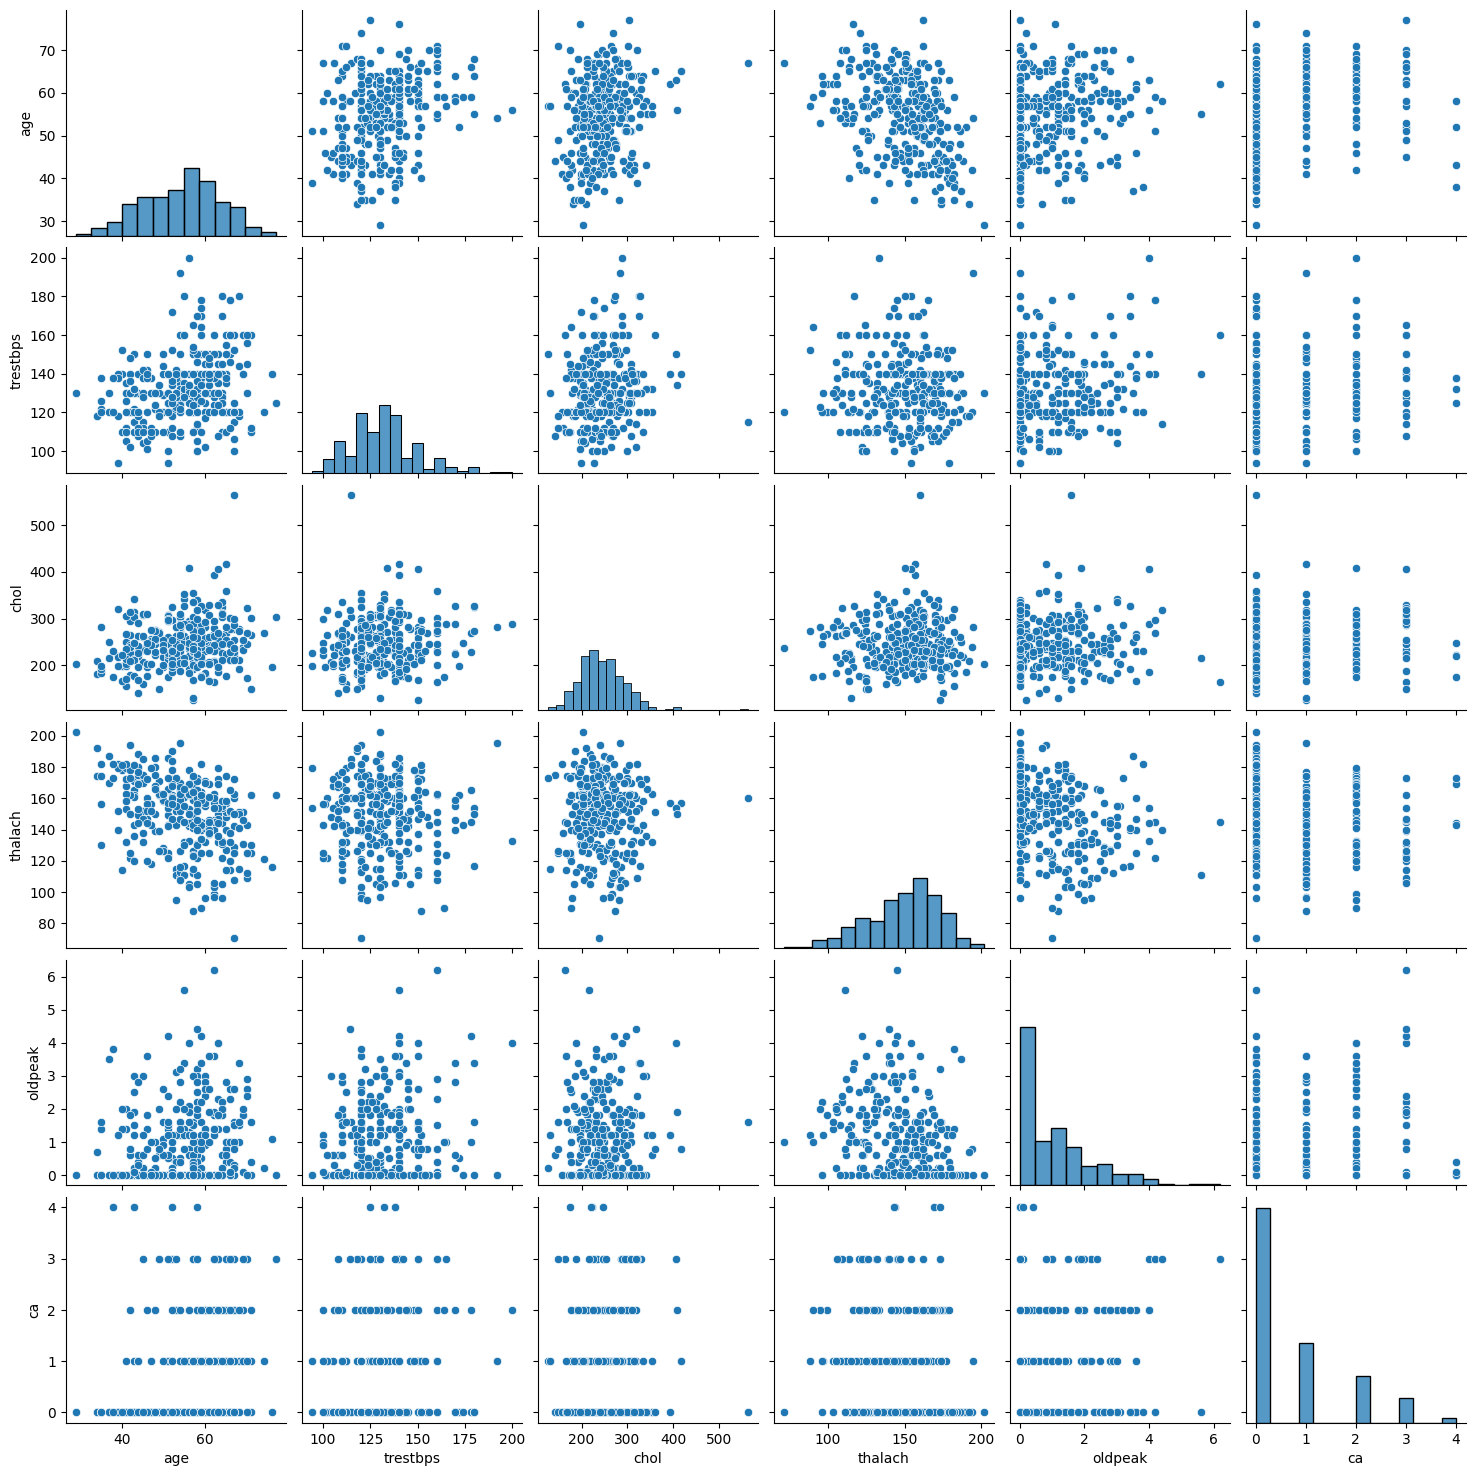

In [286]:
#Análisis de las variables categóricas en relación al diagnóstico de sufrir una cardiopatía ("target")
#Variables continuas
data_continuo = {'age': df['age'],'trestbps': df['trestbps'],'chol': df['chol'], 'thalach': df['thalach'],'oldpeak': df['oldpeak'],'ca': df['ca']}
#Crear un dataframe sólo con las variables continuas:
df_continuo= pd.DataFrame(data_continuo)
# Crear matriz de gráficos de dispersión
sns.pairplot(df_continuo)

- **Conversión de algunas variables categóricas** (las que presentan más de 2 categorías):

_Dado que 'cp', 'restecg', 'slope' y 'thal' son variables categóricas con más de dos categorías para poder realizar un mejor análisis (en vista a los resultados anteriores), las convertiremos en "dummy variables" (también conocidas como cualitativas o binarias). Variables que toman valor 1 o 0 para indicar la presencia o ausencia de una cierta característica o condición a la que hacía referencia la categoría a la que aluden_

In [287]:
#Utilización de "pd.get_dummies" (función de la biblioteca pandas) para convertir variables categóricas en variables ficticias o variables indicadoras en un DataFrame.
#Lo haremos para las variables categóricas con más de dos categorías:
dolor_pecho = pd.get_dummies(df['cp'], prefix = "cp", dtype=int)
electro = pd.get_dummies(df['restecg'], prefix = "ecg", dtype=int)
pendiente_ST = pd.get_dummies(df['slope'], prefix = "slope", dtype=int)
talasemia = pd.get_dummies(df['thal'], prefix = "thal", dtype=int)

In [288]:
#Concatenar los dataframes creados para formar un nuevo dataframe (df_model)
frames = [df, dolor_pecho, electro, pendiente_ST, talasemia]
df_model = pd.concat(frames, axis = 1)
df_model.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ecg_0,ecg_1,ecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,1,0,0,1,0


In [289]:
#Uso de la función .sum() para calcular la suma de los valores en un cada una de nuestras variables:
df_model.sum()

age         16435.0
sex           206.0
cp            291.0
trestbps    39744.0
chol        74443.0
fbs            45.0
restecg       159.0
thalach     45170.0
exang          99.0
oldpeak       315.0
slope         422.0
ca            217.0
thal          699.0
target        164.0
cp_0          143.0
cp_1           50.0
cp_2           86.0
cp_3           23.0
ecg_0         147.0
ecg_1         151.0
ecg_2           4.0
slope_0        21.0
slope_1       140.0
slope_2       141.0
thal_0          2.0
thal_1         18.0
thal_2        165.0
thal_3        117.0
dtype: float64

_Como hemos visto anteriormente hay algunas variables que presentaban categorías que no estaban definidas como por ejemplo: en "thal" la categoría 0 con dos registros (como también se ve en los datos anteriores). También se ha observado como había categorías que tenían pocos registros y no estaban proporcionando información relevante entre personas con cardiopatías y sin cardiopatías (por ejemplo "ecg2 con únicamente 4 registros").Por tanto, tendremos que eliminar estas variables nuevas creadas y también las variables categóricas originales_

In [290]:
#Eliminar las variables originales:
#eliminamos las columnas categóricas originales
df_model1 = df_model.drop(columns = ['cp', 'restecg', 'slope', 'thal'])
df_model1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,ecg_0,ecg_1,ecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [291]:
#Eliminar las variables nuevas que no suponen información relevante:
#eliminamos las columnas categóricas originales
df_model2 = df_model1.drop(columns = ['ecg_2', 'thal_0'])
df_model2.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_2,cp_3,ecg_0,ecg_1,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,1,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,1,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,1,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,0,1,0,0,1,0,1,0


In [292]:
df_model2.sum()

age         16435.0
sex           206.0
trestbps    39744.0
chol        74443.0
fbs            45.0
thalach     45170.0
exang          99.0
oldpeak       315.0
ca            217.0
target        164.0
cp_0          143.0
cp_1           50.0
cp_2           86.0
cp_3           23.0
ecg_0         147.0
ecg_1         151.0
slope_0        21.0
slope_1       140.0
slope_2       141.0
thal_1         18.0
thal_2        165.0
thal_3        117.0
dtype: float64

In [293]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   trestbps  302 non-null    int64  
 3   chol      302 non-null    int64  
 4   fbs       302 non-null    int64  
 5   thalach   302 non-null    int64  
 6   exang     302 non-null    int64  
 7   oldpeak   302 non-null    float64
 8   ca        302 non-null    int64  
 9   target    302 non-null    int64  
 10  cp_0      302 non-null    int32  
 11  cp_1      302 non-null    int32  
 12  cp_2      302 non-null    int32  
 13  cp_3      302 non-null    int32  
 14  ecg_0     302 non-null    int32  
 15  ecg_1     302 non-null    int32  
 16  slope_0   302 non-null    int32  
 17  slope_1   302 non-null    int32  
 18  slope_2   302 non-null    int32  
 19  thal_1    302 non-null    int32  
 20  thal_2    302 non-null    int32 

In [294]:
df_model2.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_2,cp_3,ecg_0,ecg_1,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,131.602649,246.500000,0.149007,149.569536,0.327815,1.043046,0.718543,0.543046,...,0.284768,0.076159,0.486755,0.50000,0.069536,0.463576,0.466887,0.059603,0.546358,0.387417
std,9.04797,0.466426,17.563394,51.753489,0.356686,22.903527,0.470196,1.161452,1.006748,0.498970,...,0.452053,0.265693,0.500654,0.50083,0.254786,0.499499,0.499730,0.237142,0.498673,0.487969
min,29.00000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,152.500000,0.000000,0.800000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.50000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.00000,1.000000,140.000000,274.750000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.00000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Gráficos de dispersión entre la variable numérica edad y las "dummy variables" (también conocidas como cualitativas o binarias) que se quedan en el dataframe "df_model2" teniendo en cuenta el diagnóstico de cardiopatía positivo o negativo.**

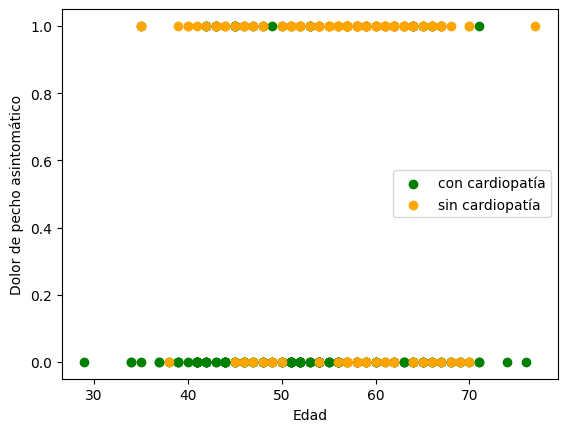

In [295]:
#Gráfico de dispersión entre edad y cp_0 - dolor de pecho asintomático (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.cp_0[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.cp_0[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Dolor de pecho asintomático')
plt.show()

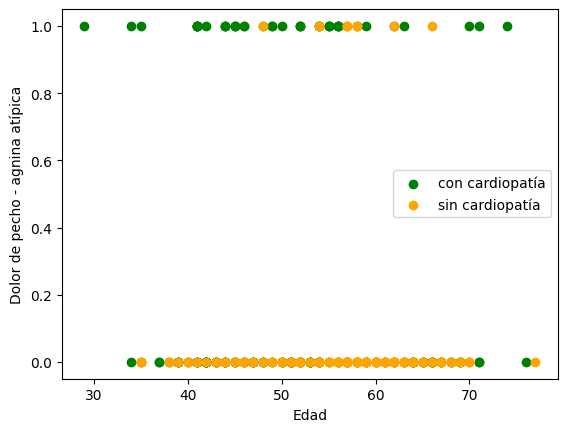

In [296]:
#Gráfico de dispersión entre edad y cp_1 - dolor de pecho - angina atípica (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.cp_1[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.cp_1[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Dolor de pecho - agnina atípica')
plt.show()

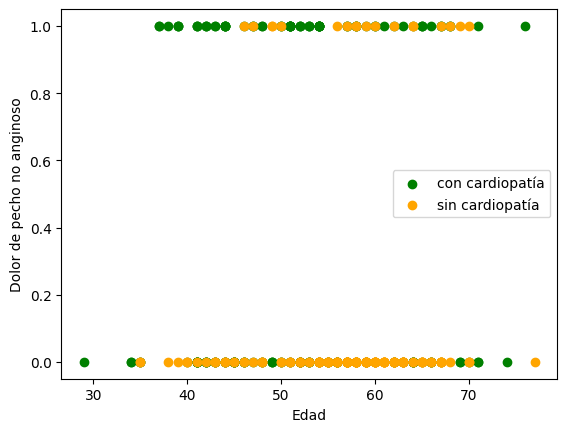

In [297]:
#Gráfico de dispersión entre edad y cp_2 - dolor de pecho no anginoso (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.cp_2[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.cp_2[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Dolor de pecho no anginoso')
plt.show()

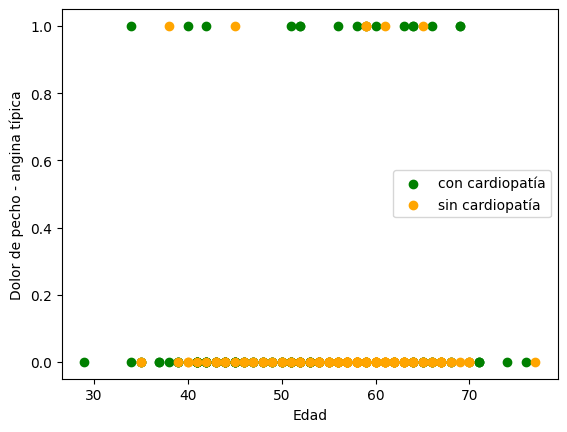

In [298]:
#Gráfico de dispersión entre edad y cp_3 - dolor de pecho - angina típica (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.cp_3[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.cp_3[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Dolor de pecho - angina típica')
plt.show()

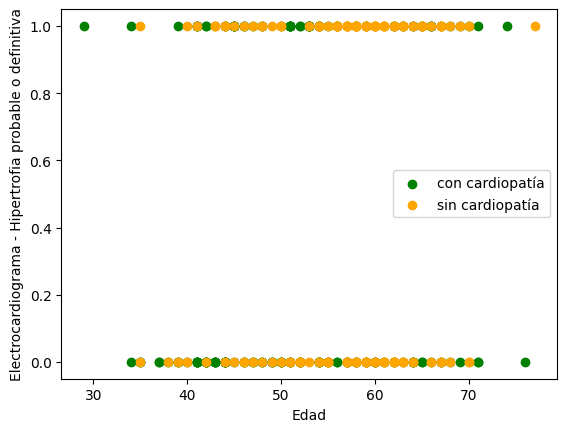

In [299]:
#Gráfico de dispersión entre edad y ecg_0 - Electrocardiograma - Hipertrofia probable o definitiva (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.ecg_0[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.ecg_0[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Electrocardiograma - Hipertrofia probable o definitiva')
plt.show()

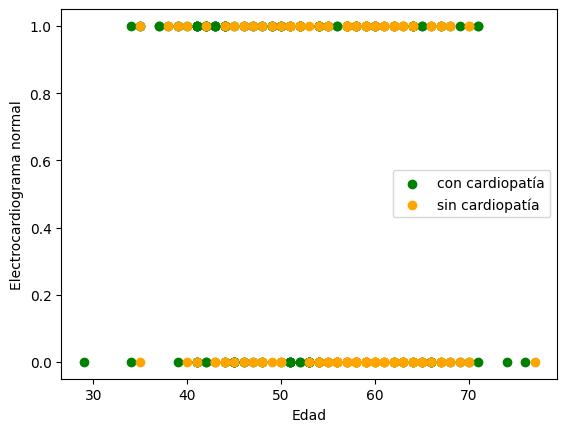

In [300]:
#Gráfico de dispersión entre edad y ecg_1 - Electrocardiograma normal (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.ecg_1[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.ecg_1[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Electrocardiograma normal')
plt.show()

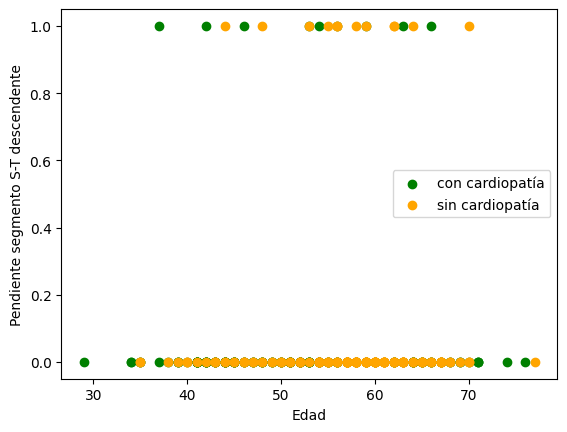

In [301]:
#Gráfico de dispersión entre edad y slope_0 - Pendiente segmento S-T descendente (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.slope_0[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.slope_0[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Pendiente segmento S-T descendente')
plt.show()

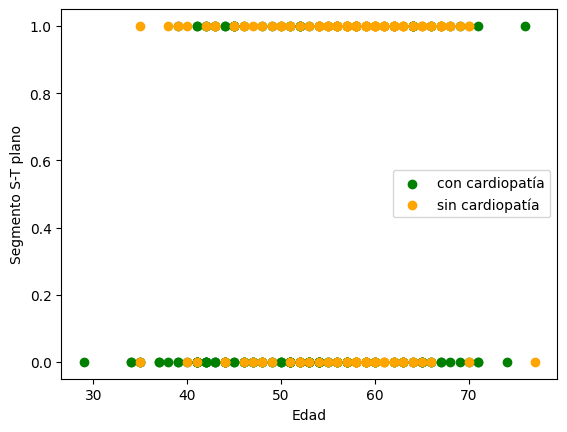

In [302]:
#Gráfico de dispersión entre edad y slope_1 - Segmento S-T plano (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.slope_1[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.slope_1[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Segmento S-T plano')
plt.show()

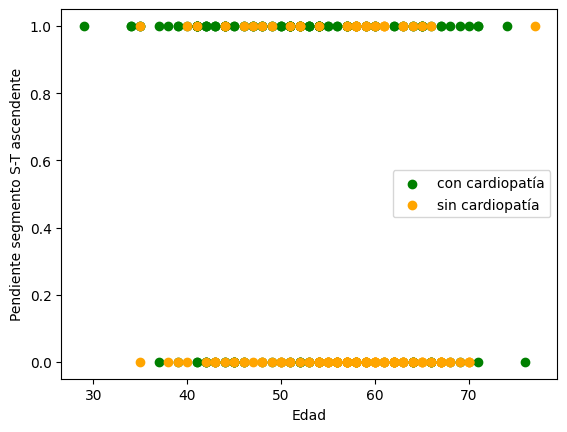

In [303]:
#Gráfico de dispersión entre edad y slope_2 - Pendiente segmento S-T ascendente (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.slope_2[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.slope_2[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Pendiente segmento S-T ascendente')
plt.show()

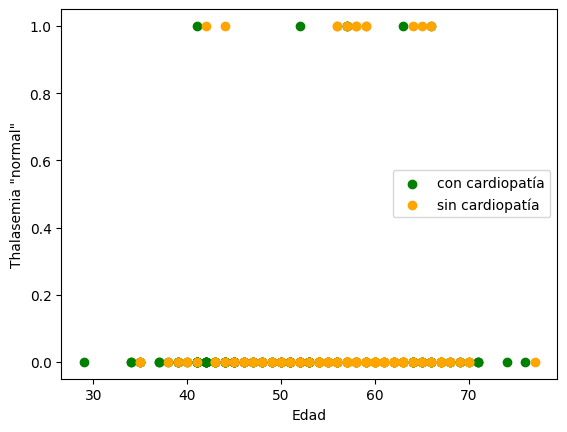

In [304]:
#Gráfico de dispersión entre edad y thal_1 - Thalasemia "normal" (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.thal_1[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.thal_1[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Thalasemia "normal"')
plt.show()

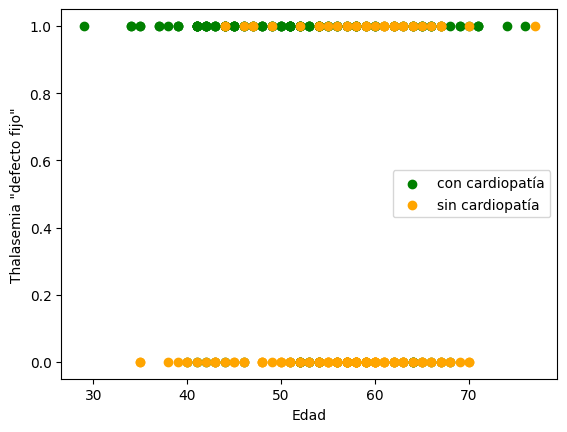

In [305]:
#Gráfico de dispersión entre edad y thal_2 - Thalasemia "defecto fijo" (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.thal_2[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.thal_2[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Thalasemia "defecto fijo"')
plt.show()

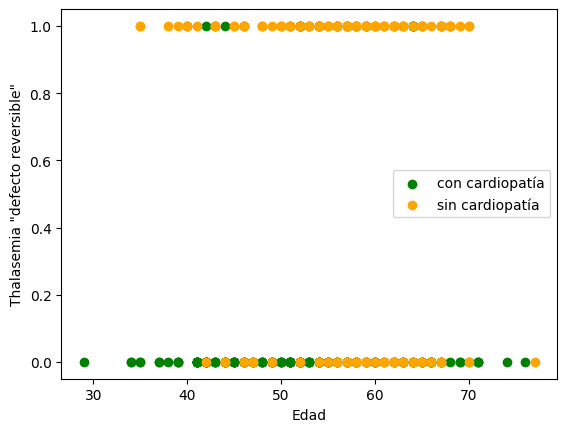

In [306]:
#Gráfico de dispersión entre edad y thal_3 - Thalasemia "defecto reversible" (teniendo en cuenta si existe cardiopatía o no):

plt.scatter(x=df_model2.age[df_model2.target==1], y=df_model2.thal_3[(df_model2.target==1)], c='green')
plt.scatter(x=df_model2.age[df_model2.target==0], y=df_model2.thal_3[(df_model2.target==0)], c='orange')
plt.legend(['con cardiopatía', 'sin cardiopatía'])
plt.xlabel('Edad')
plt.ylabel('Thalasemia "defecto reversible"')
plt.show()

**ANÁLISIS DE CORRELACIÓN**

_El análisis de correlación es un método de evaluación estadística utilizado para estudiar la fuerza de una relación entre variables (dos a dos). Una vez que hemos creado nuevas "variables" de las categóricas iniciales con más de dos categorías procederé a hacer el análisis_


In [307]:
# Calcular la matriz de correlación
correlation_matrix = df_model2.corr()

print(correlation_matrix)

               age       sex  trestbps      chol       fbs   thalach  \
age       1.000000 -0.094962  0.283121  0.207216  0.119492 -0.395235   
sex      -0.094962  1.000000 -0.057647 -0.195571  0.046022 -0.046439   
trestbps  0.283121 -0.057647  1.000000  0.125256  0.178125 -0.048023   
chol      0.207216 -0.195571  0.125256  1.000000  0.011428 -0.005308   
fbs       0.119492  0.046022  0.178125  0.011428  1.000000 -0.007169   
thalach  -0.395235 -0.046439 -0.048023 -0.005308 -0.007169  1.000000   
exang     0.093216  0.143460  0.068526  0.064099  0.024729 -0.377411   
oldpeak   0.206040  0.098322  0.194600  0.050086  0.004514 -0.342201   
ca        0.302261  0.113060  0.099248  0.086878  0.144935 -0.228311   
target   -0.221476 -0.283609 -0.146269 -0.081437 -0.026826  0.419955   
cp_0      0.133521  0.091960  0.022626  0.066681 -0.061606 -0.374565   
cp_1     -0.150921 -0.040290 -0.081359 -0.014828 -0.061302  0.250335   
cp_2     -0.050494 -0.120731 -0.047212 -0.030957  0.086238  0.16

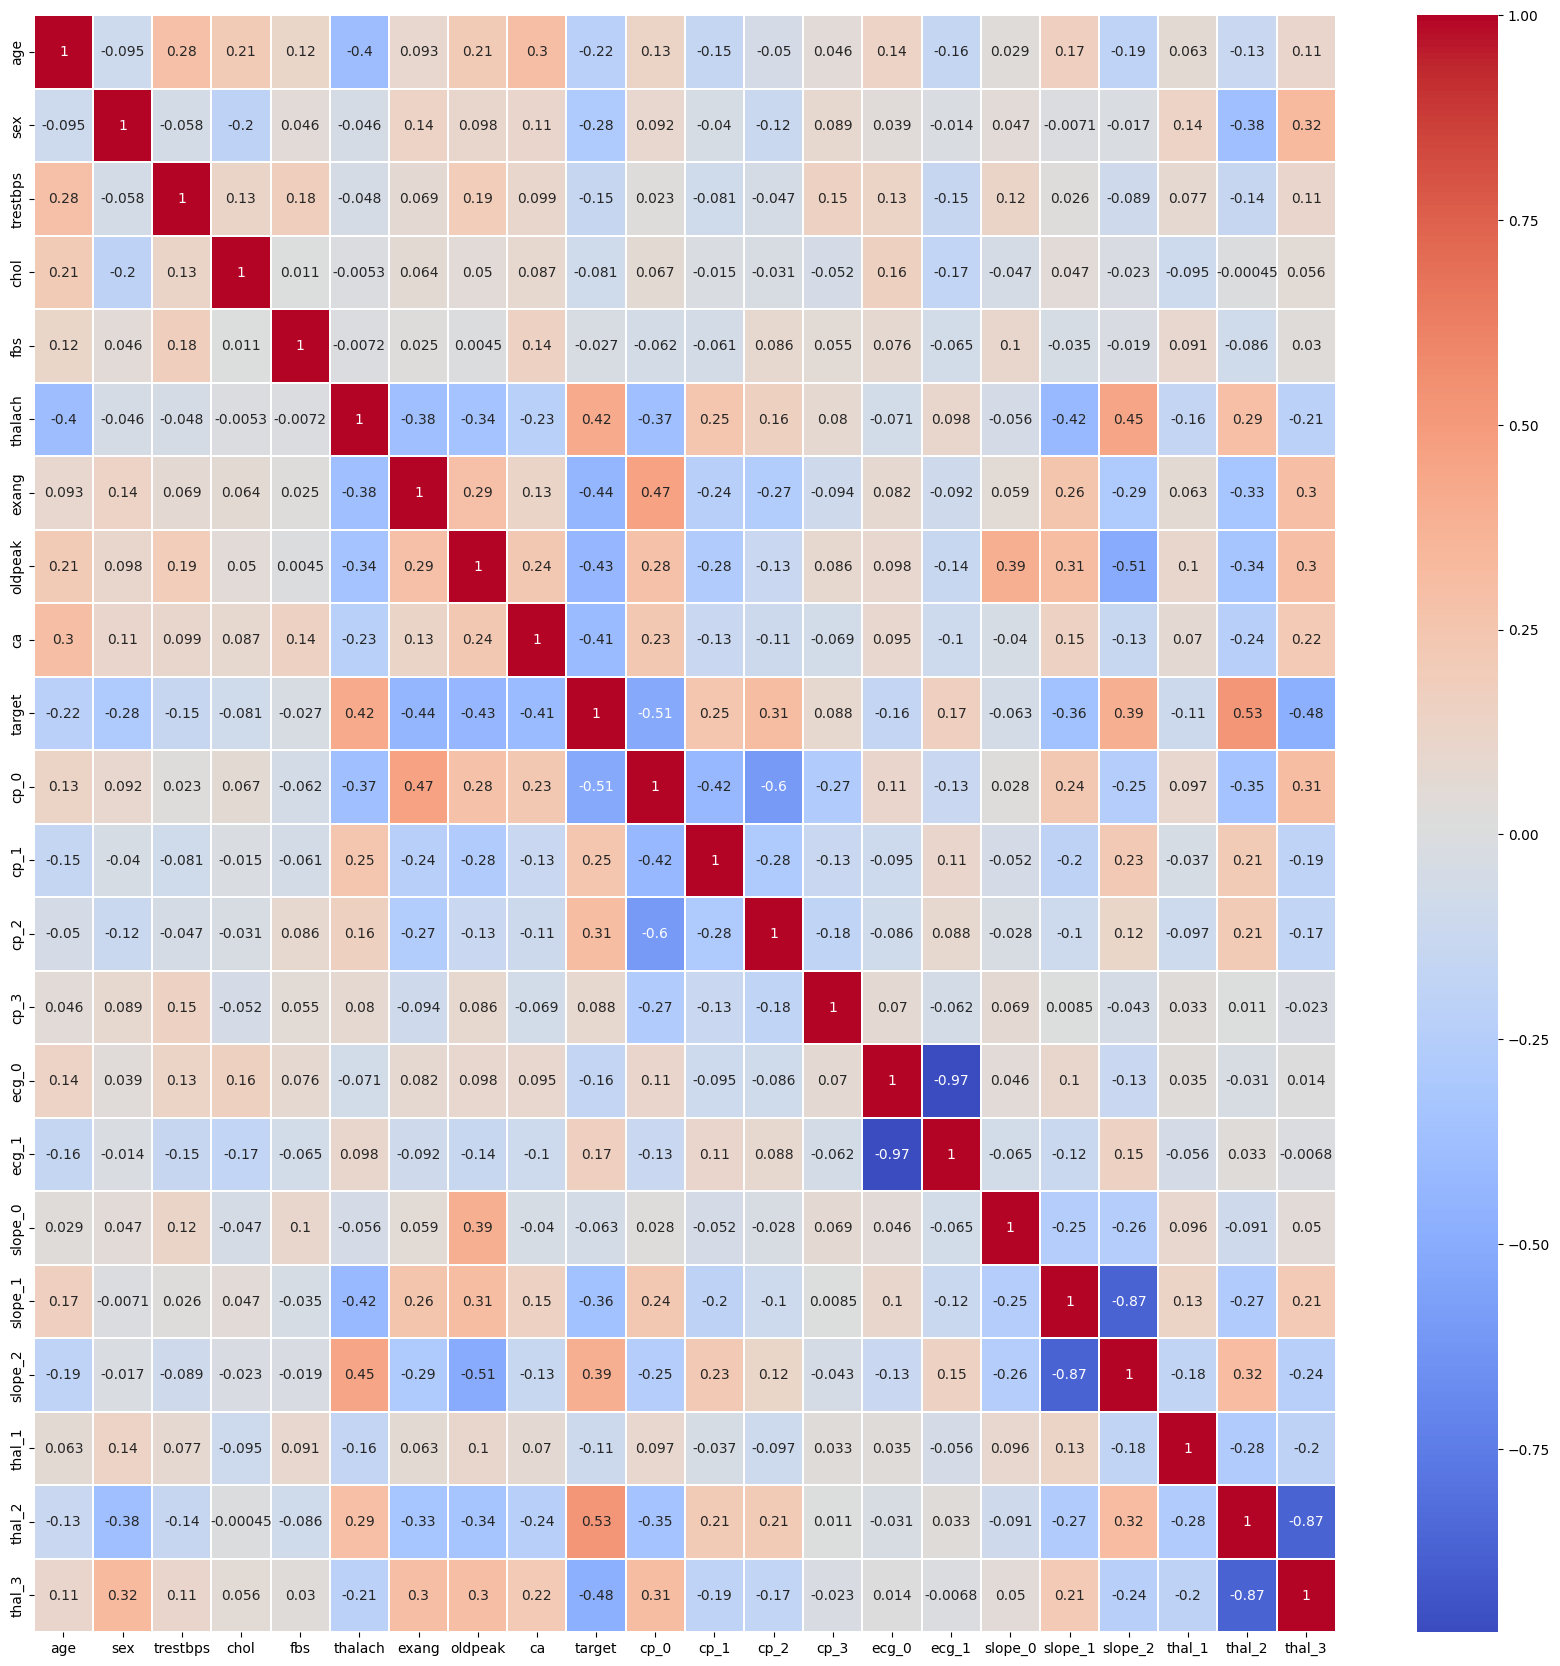

In [308]:
#A partir de la creación de una matriz de correlación y un plot "heatmap" con Seaborn

#Código para crear una figura y un conjunto de ejes (subplots) en una sola llamada:
## "f" variable que representa la figura y "ax" es una variable que representa el conjunto de ejes (subplots)
## "plt.subplots()" función que crea una figura y un conjunto de ejes
## El argumento "figsize" se utiliza para establecer el tamaño de la figura

f, ax = plt.subplots(figsize=(21, 21))

#Matriz de correlación

correlation_matrix

#Plot using seaborn library
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

_La **matriz de correlación** como representación tabular y el **plot de "heatmap"** como se utiliza para visualizar rápidamente las relaciones y patrones de correlación entre variables en elconjunto de datos._

_Son herramientas útiles para explorar y visualizar e **para identificar patrones, dependencias y posibles variables predictivas en un análisis estadístico o en la construcción de modelos predictivos.**_

**ANÁLISIS DE CORRELACIÓN MODELO A Y MODELO B**

In [309]:
#A partir de lo anterior vamos a hacer dos dataframes:
##df_modelA - con variables que superan el 0.40 o -0.40 (7 variables) en relación con la variable del diagnóstico ('target')
##df_modelB - con variables que superan el 0.30 o -0.30 (10 variables) en relación con la variable del diagnóstico ('target')

#Eliminar las variables que no cumplan lo anterior para el modelo A:
df_modelA = df_model2.drop(columns = ['age', 'sex','trestbps', 'chol','fbs', 'cp_1','cp_2', 'cp_3','ecg_0', 'ecg_1','slope_0', 'slope_1','slope_2', 'thal_1'])
#Eliminar las variables que no cumplan lo anterior para el modelo B:
df_modelB = df_model2.drop(columns = ['age', 'sex','trestbps', 'chol','fbs', 'cp_1', 'cp_3','ecg_0', 'ecg_1','slope_0', 'thal_1'])

- **Modelo A:**

In [310]:
df_modelA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   thalach  302 non-null    int64  
 1   exang    302 non-null    int64  
 2   oldpeak  302 non-null    float64
 3   ca       302 non-null    int64  
 4   target   302 non-null    int64  
 5   cp_0     302 non-null    int32  
 6   thal_2   302 non-null    int32  
 7   thal_3   302 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 15.5 KB


In [311]:
# Calcular la matriz de correlación del modelo A
correlation_matrixA = df_modelA.corr()

print(correlation_matrixA)

          thalach     exang   oldpeak        ca    target      cp_0    thal_2  \
thalach  1.000000 -0.377411 -0.342201 -0.228311  0.419955 -0.374565  0.292634   
exang   -0.377411  1.000000  0.286766  0.125377 -0.435601  0.467949 -0.327154   
oldpeak -0.342201  0.286766  1.000000  0.236560 -0.429146  0.278218 -0.337298   
ca      -0.228311  0.125377  0.236560  1.000000 -0.408992  0.232580 -0.235317   
target   0.419955 -0.435601 -0.429146 -0.408992  1.000000 -0.514626  0.526030   
cp_0    -0.374565  0.467949  0.278218  0.232580 -0.514626  1.000000 -0.348067   
thal_2   0.292634 -0.327154 -0.337298 -0.235317  0.526030 -0.348067  1.000000   
thal_3  -0.213326  0.298946  0.300503  0.215936 -0.484887  0.307650 -0.872748   

           thal_3  
thalach -0.213326  
exang    0.298946  
oldpeak  0.300503  
ca       0.215936  
target  -0.484887  
cp_0     0.307650  
thal_2  -0.872748  
thal_3   1.000000  


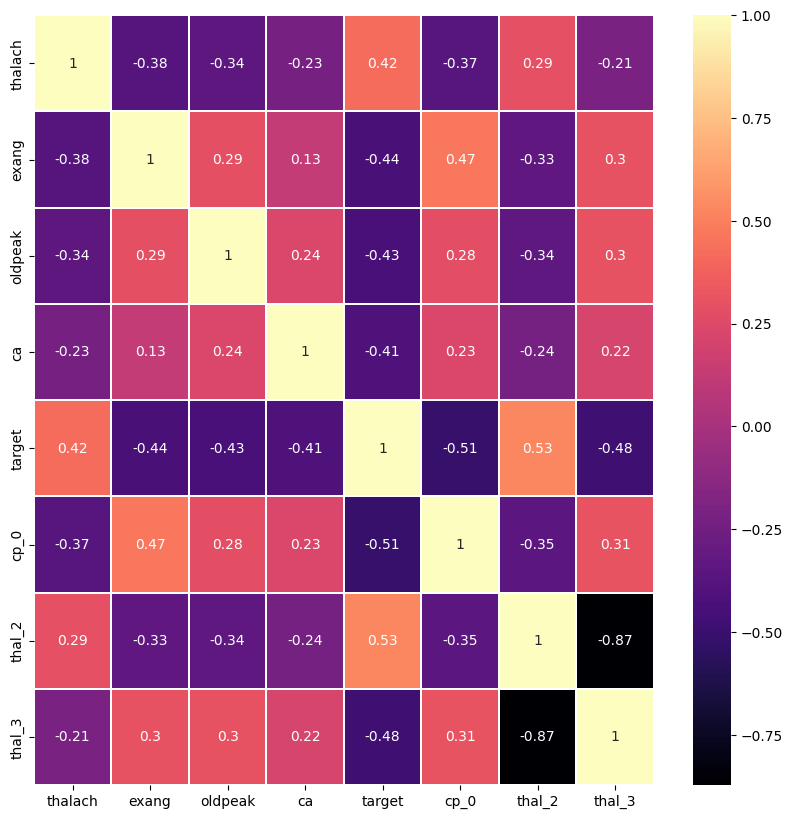

In [312]:
#A partir de la creación de la matriz de correlación y un plot "heatmap" con Seaborn

#Código para crear una figura y un conjunto de ejes (subplots) en una sola llamada:
## "f" variable que representa la figura y "ax" es una variable que representa el conjunto de ejes (subplots)
## "plt.subplots()" función que crea una figura y un conjunto de ejes
## El argumento "figsize" se utiliza para establecer el tamaño de la figura

f, ax = plt.subplots(figsize=(10, 10))

#Matriz de correlación

correlation_matrixA

#Plot using seaborn library
sns.heatmap(correlation_matrixA, annot = True, cmap='magma',linewidths=.1)
plt.show()

- **Modelo B:**

In [313]:
df_modelB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   thalach  302 non-null    int64  
 1   exang    302 non-null    int64  
 2   oldpeak  302 non-null    float64
 3   ca       302 non-null    int64  
 4   target   302 non-null    int64  
 5   cp_0     302 non-null    int32  
 6   cp_2     302 non-null    int32  
 7   slope_1  302 non-null    int32  
 8   slope_2  302 non-null    int32  
 9   thal_2   302 non-null    int32  
 10  thal_3   302 non-null    int32  
dtypes: float64(1), int32(6), int64(4)
memory usage: 19.0 KB


In [314]:
# Calcular la matriz de correlación del modelo A
correlation_matrixB = df_modelB.corr()

print(correlation_matrixB)

          thalach     exang   oldpeak        ca    target      cp_0      cp_2  \
thalach  1.000000 -0.377411 -0.342201 -0.228311  0.419955 -0.374565  0.161088   
exang   -0.377411  1.000000  0.286766  0.125377 -0.435601  0.467949 -0.268716   
oldpeak -0.342201  0.286766  1.000000  0.236560 -0.429146  0.278218 -0.128464   
ca      -0.228311  0.125377  0.236560  1.000000 -0.408992  0.232580 -0.108001   
target   0.419955 -0.435601 -0.429146 -0.408992  1.000000 -0.514626  0.313696   
cp_0    -0.374565  0.467949  0.278218  0.232580 -0.514626  1.000000 -0.598400   
cp_2     0.161088 -0.268716 -0.128464 -0.108001  0.313696 -0.598400  1.000000   
slope_1 -0.417808  0.256119  0.309085  0.154621 -0.360258  0.235507 -0.101044   
slope_2  0.446050 -0.285917 -0.509830 -0.134148  0.392121 -0.249439  0.115412   
thal_2   0.292634 -0.327154 -0.337298 -0.235317  0.526030 -0.348067  0.206522   
thal_3  -0.213326  0.298946  0.300503  0.215936 -0.484887  0.307650 -0.170458   

          slope_1   slope_2

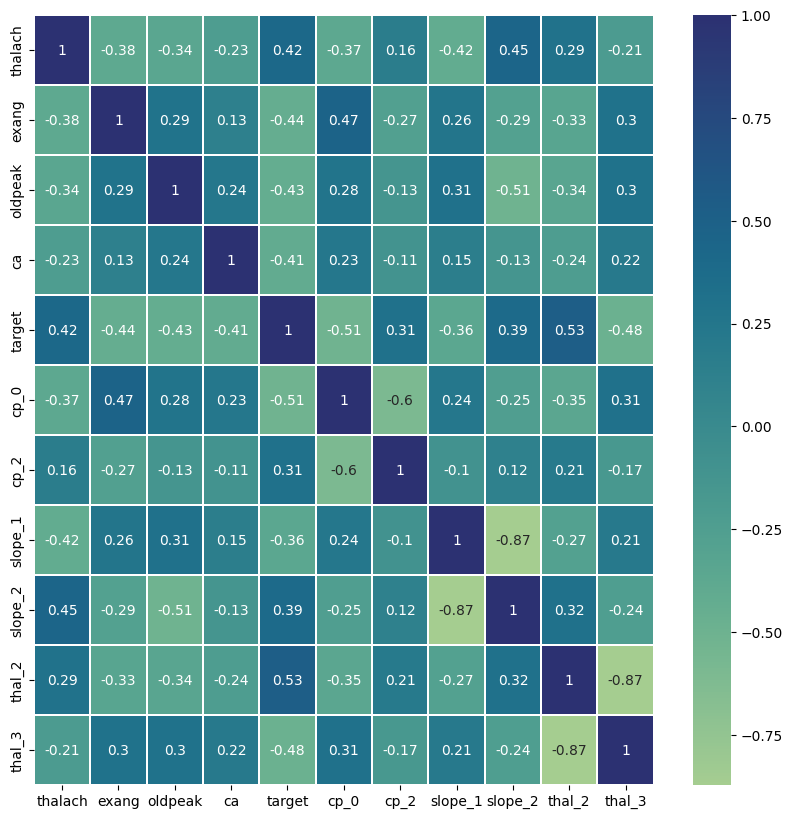

In [315]:
#A partir de la creación de la matriz de correlación y un plot "heatmap" con Seaborn

#Código para crear una figura y un conjunto de ejes (subplots) en una sola llamada:
## "f" variable que representa la figura y "ax" es una variable que representa el conjunto de ejes (subplots)
## "plt.subplots()" función que crea una figura y un conjunto de ejes
## El argumento "figsize" se utiliza para establecer el tamaño de la figura

f, ax = plt.subplots(figsize=(10, 10))

#Matriz de correlación

correlation_matrixB

#Plot using seaborn library
sns.heatmap(correlation_matrixB, annot = True, cmap='crest',linewidths=.1)
plt.show()

  **IMPLEMENTACIÓN Y VISUALIZACIÓN DE UNA REGRESIÓN LINEAL MÚLTIPLE MODELO A**

- Dividir el conjunto de datos para **entrenar y probar/testar**

_**Regresion_Lineal_ScikitLearn**_

In [360]:
# Dividimos el dataset en entramiento y pruebas
# Es necesario dividir el Dataset lo más aleatorio posible para repartir los valores
# Primero se mezclan los valores en proporción 80/20 (entrenamiento y pruebas)

combina = np.random.rand(len(df_modelA)) < 0.70
entrenamiento = df_modelA[combina]
prueba = df_modelA[~combina]

In [361]:
#Sólo voy a coger para el modelo las variables independientes con correlación > 0,40 con la variable dependiente en el "sns.heatmap(correlation_matrix)" del Modelo A:
model_A = LinearRegression()
X_entrenamiento = np.asanyarray(entrenamiento[['thalach', 'exang',  'oldpeak', 'ca', 'cp_0', 'thal_2', 'thal_3']])
y_entrenamiento = np.asanyarray(entrenamiento[['target']])
model_A.fit (X_entrenamiento, y_entrenamiento)


LinearRegression()

In [362]:
X_prueba = np.asanyarray(prueba[['thalach', 'exang',  'oldpeak', 'ca', 'cp_0', 'thal_2', 'thal_3']])
y_prueba = np.asanyarray(prueba[['target']])
# Obtener las predicciones del modelo en los datos de prueba
y_prediccion_A = model_A.predict(X_prueba)

In [363]:
X_entrenamiento.shape

(217, 7)

In [364]:
X_prueba.shape

(85, 7)

_**Las funciones de entrenamiento tienen 217 registros y las funciones de prueba tienen 85 registros**_

**_Para evaluar el rendimiento de un modelo de regresión lineal múltiple, se utilizan diversas métricas, entre las cuales se destacan el error cuadrático medio (MSE) y el coeficiente de determinación (r^2)_**

In [366]:
#Evaluar el rendimiento del modelo:
mse_A = mean_squared_error(y_prueba, y_prediccion_A)
r2_A = r2_score(y_prueba, y_prediccion_A)

print("Error cuadrático medio (MSE):", mse_A)
print("Coeficiente de determinación (R^2):", r2_A)

Error cuadrático medio (MSE): 0.10480834589662681
Coeficiente de determinación (R^2): 0.5793109449427063


Los coeficientes son: [ 0.00243995 -0.13519417 -0.0635683  -0.10632655 -0.22631659  0.18171427
 -0.10617752]
El intercepto es: 0.4141443022000152


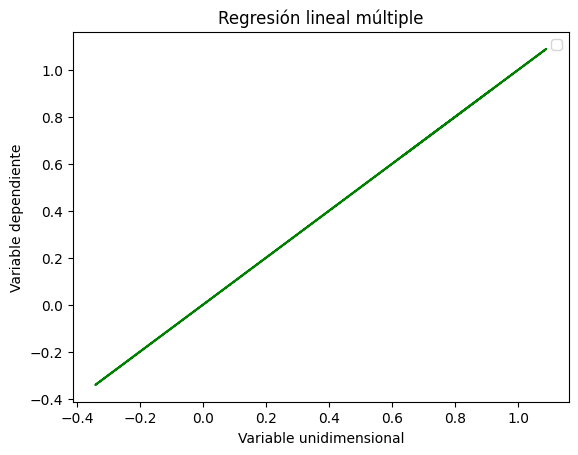

In [367]:
# Variables independientes
X = np.array(df_modelA[['thalach', 'exang',  'oldpeak', 'ca', 'cp_0', 'thal_2', 'thal_3']])  # variables independientes

# Variable dependiente
y = np.array(df_modelA['target']) #variable dependiente

# Ajuste de la regresión múltiple
model_A.fit(X, y)

# Coeficientes y término de intercepción
coeficientes = model_A.coef_
intercepto = model_A.intercept_

print("Los coeficientes son:", coeficientes)
print("El intercepto es:", intercepto)

# Variable unidimensional (proyección)
X_unidimensional = np.sum(coeficientes * X, axis=1) + intercepto

# Gráfico
plt.plot(X_unidimensional, model_A.predict(X), color='green', label='Recta de regresión')
plt.xlabel('Variable unidimensional')
plt.ylabel('Variable dependiente')
plt.title('Regresión lineal múltiple')
plt.legend(labels=[])
plt.show()

_En un modelo de regresión lineal múltiple, los coeficientes de regresión y el intercepto o coeficiente de intercepción son parámetros que representan la relación entre las variables independientes y la variable dependiente en la forma de una ecuación lineal(y = b0 + b1x1 + b2x2 + ... + bn*xn) y (variable dependiente), b0 (intercepto), b1, b2, ..., bn (coeficientes asociados a las variables independientes) y x1, x2, ..., xn (variables independientes)._
 
_Una **variable unidimensional** se refiere a una proyección unidimensional de las variables independientes del modelo.
Es importante tener en cuenta que la proyección unidimensional puede no capturar todas las complejidades o interacciones entre las variables independientes, especialmente en modelos con múltiples variables independientes._

**IMPLEMENTACIÓN Y VISUALIZACIÓN DE UNA REGRESIÓN LINEAL MÚLTIPLE MODELO B**

- Dividir el conjunto de datos para **entrenar y probar/testar**

**Regresion_Lineal_ScikitLearn**

In [384]:
# Dividimos el dataset en entramiento y pruebas
# Es necesario dividir el Dataset lo más aleatorio posible para repartir los valores
# Primero se mezclan los valores en proporción 80/20 (entrenamiento y pruebas)

combina = np.random.rand(len(df_modelB)) < 0.70
entrenamiento = df_modelB[combina]
prueba = df_modelB[~combina]

In [385]:
model_B = LinearRegression()
X_entrenamiento = np.asanyarray(entrenamiento[['thalach', 'exang',  'oldpeak', 'ca', 'cp_0', 'cp_2', 'slope_1', 'slope_2', 'thal_2', 'thal_3']])
y_entrenamiento = np.asanyarray(entrenamiento[['target']])
model_B.fit (X_entrenamiento, y_entrenamiento)


LinearRegression()

In [386]:
X_prueba = np.asanyarray(prueba[['thalach', 'exang',  'oldpeak', 'ca', 'cp_0', 'cp_2', 'slope_1', 'slope_2', 'thal_2', 'thal_3']])
y_prueba = np.asanyarray(prueba[['target']])
# Obtener las predicciones del modelo en los datos de prueba
y_prediccion_B = model_B.predict(X_prueba)

In [387]:
X_entrenamiento.shape

(215, 10)

In [388]:
X_prueba.shape

(87, 10)

_**Las funciones de entrenamiento tienen 215 registros y las funciones de prueba tienen 87 registros**_

In [390]:
#Evaluar el rendimiento del modelo:
mse_B = mean_squared_error(y_prueba, y_prediccion_B)
r2_B = r2_score(y_prueba, y_prediccion_B)

print("Error cuadrático medio (MSE):", mse_B)
print("Coeficiente de determinación (R^2):", r2_B)

Error cuadrático medio (MSE): 0.1286434928532647
Coeficiente de determinación (R^2): 0.4837207861047931


_El modelo B presenta un r^2 menos fiable (< 0.5)_

Los coeficientes son: [[ 0.00194011 -0.09270023 -0.04487266 -0.09682148 -0.19380251  0.03321332
  -0.09035325  0.03311526  0.23915265 -0.1151411 ]]
El intercepto es: [0.42866889]


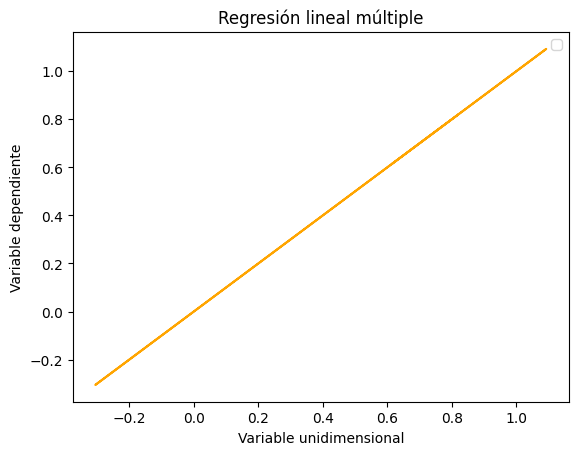

In [391]:
# Variables independientes
X = np.array(df_modelB[['thalach', 'exang',  'oldpeak', 'ca', 'cp_0', 'cp_2', 'slope_1', 'slope_2', 'thal_2', 'thal_3']])  # variables independientes

# Variable dependiente
y = np.array(df_modelB['target']) #variable dependiente

# Ajuste de la regresión múltiple
model_A.fit(X, y)

# Coeficientes y término de intercepción
coeficientes = model_B.coef_
intercepto = model_B.intercept_

print("Los coeficientes son:", coeficientes)
print("El intercepto es:", intercepto)

# Variable unidimensional (proyección)
X_unidimensional = np.sum(coeficientes * X, axis=1) + intercepto

# Gráfico
plt.plot(X_unidimensional, model_B.predict(X), color='orange', label='Recta de regresión')
plt.xlabel('Variable unidimensional')
plt.ylabel('Variable dependiente')
plt.title('Regresión lineal múltiple')
plt.legend(labels=[])
plt.show()